In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teacher_core = pd.read_excel('../data/Teacher_Core_District_Consolidated_2022 (1).xlsx')
teacher_core

,Number,District ID,District,Item,Old Item,Topic,Full Question,Prompt,See Column,Selected,...,2 to 4 hours,4 to 6 hours,6 to 10 hours,More than 10 hours,Less than 30 minutes a day,"30 minutes or more, less than 45 minutes a day","45 minutes or more, less than 49 minutes a day","50 minutes or more, less than 60 minutes a day",60 minutes or more a day,Response Rate
0,1,10,Anderson County,SM_01,NaN,SUMMATIVE MEASURE: School Climate,NaN,NaN,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
1,2,10,Anderson County,TC_01a,TC_01a,School Climate,Please indicate the extent to which you agree ...,There is an atmosphere of trust and mutual res...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
2,3,10,Anderson County,TC_01c,TC_01c,School Climate,Please indicate the extent to which you agree ...,I am generally satisfied with being a teacher ...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
3,4,10,Anderson County,TC_01d,TC_01d,School Climate,Please indicate the extent to which you agree ...,I would recommend this school to parents seeki...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
4,5,10,Anderson County,TC_01e,TC_01e,School Climate,Please indicate the extent to which you agree ...,Our school staff is a learning community in wh...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,72,964,Tennessee Schools For The Deaf,TC_23b,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Student grief and trauma related to COVID-19,J,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9648,73,964,Tennessee Schools For The Deaf,TC_23c,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Maintaining and building relationships with st...,J,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9649,74,964,Tennessee Schools For The Deaf,TC_23d,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Students missing crucial services/supports (fr...,J,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9650,75,964,Tennessee Schools For The Deaf,TC_23e,NaN,COVID Issues,Which of the listed issues related to COVID-19...,The long-term economic impacts for me and my s...,J,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [3]:
teacher_core = pd.DataFrame(teacher_core)
teacher_core

,Number,District ID,District,Item,Old Item,Topic,Full Question,Prompt,See Column,Selected,...,2 to 4 hours,4 to 6 hours,6 to 10 hours,More than 10 hours,Less than 30 minutes a day,"30 minutes or more, less than 45 minutes a day","45 minutes or more, less than 49 minutes a day","50 minutes or more, less than 60 minutes a day",60 minutes or more a day,Response Rate
0,1,10,Anderson County,SM_01,NaN,SUMMATIVE MEASURE: School Climate,NaN,NaN,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
1,2,10,Anderson County,TC_01a,TC_01a,School Climate,Please indicate the extent to which you agree ...,There is an atmosphere of trust and mutual res...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
2,3,10,Anderson County,TC_01c,TC_01c,School Climate,Please indicate the extent to which you agree ...,I am generally satisfied with being a teacher ...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
3,4,10,Anderson County,TC_01d,TC_01d,School Climate,Please indicate the extent to which you agree ...,I would recommend this school to parents seeki...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
4,5,10,Anderson County,TC_01e,TC_01e,School Climate,Please indicate the extent to which you agree ...,Our school staff is a learning community in wh...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,72,964,Tennessee Schools For The Deaf,TC_23b,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Student grief and trauma related to COVID-19,J,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9648,73,964,Tennessee Schools For The Deaf,TC_23c,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Maintaining and building relationships with st...,J,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9649,74,964,Tennessee Schools For The Deaf,TC_23d,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Students missing crucial services/supports (fr...,J,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9650,75,964,Tennessee Schools For The Deaf,TC_23e,NaN,COVID Issues,Which of the listed issues related to COVID-19...,The long-term economic impacts for me and my s...,J,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [4]:
district_numbers = pd.read_csv('../data/data_district_to_county_crosswalk.csv')

In [5]:
teacher_core = pd.merge(teacher_core, district_numbers, left_on = 'District ID', right_on = 'District Number', how = 'inner')
teacher_core

,Number,District ID,District,Item,Old Item,Topic,Full Question,Prompt,See Column,Selected,...,More than 10 hours,Less than 30 minutes a day,"30 minutes or more, less than 45 minutes a day","45 minutes or more, less than 49 minutes a day","50 minutes or more, less than 60 minutes a day",60 minutes or more a day,Response Rate,County Number,County Name,District Number
0,1,10,Anderson County,SM_01,NaN,SUMMATIVE MEASURE: School Climate,NaN,NaN,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.0,1,Anderson County,10
1,2,10,Anderson County,TC_01a,TC_01a,School Climate,Please indicate the extent to which you agree ...,There is an atmosphere of trust and mutual res...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.0,1,Anderson County,10
2,3,10,Anderson County,TC_01c,TC_01c,School Climate,Please indicate the extent to which you agree ...,I am generally satisfied with being a teacher ...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.0,1,Anderson County,10
3,4,10,Anderson County,TC_01d,TC_01d,School Climate,Please indicate the extent to which you agree ...,I would recommend this school to parents seeki...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.0,1,Anderson County,10
4,5,10,Anderson County,TC_01e,TC_01e,School Climate,Please indicate the extent to which you agree ...,Our school staff is a learning community in wh...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.0,1,Anderson County,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,72,961,Alvin C York Institute,TC_23b,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Student grief and trauma related to COVID-19,J,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97.0,49,Fentress County,961
9496,73,961,Alvin C York Institute,TC_23c,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Maintaining and building relationships with st...,J,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97.0,49,Fentress County,961
9497,74,961,Alvin C York Institute,TC_23d,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Students missing crucial services/supports (fr...,J,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97.0,49,Fentress County,961
9498,75,961,Alvin C York Institute,TC_23e,NaN,COVID Issues,Which of the listed issues related to COVID-19...,The long-term economic impacts for me and my s...,J,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97.0,49,Fentress County,961


In [6]:
teacher_core_stats = teacher_core[['District', 'Prompt', 'Strongly Disagree', 'Disagree',
                             'Agree', 'Strongly Agree', 'County Name']]
teacher_core_stats.head()

,District,Prompt,Strongly Disagree,Disagree,Agree,Strongly Agree,County Name
0,Anderson County,NaN,4.0,11.0,47.0,38.0,Anderson County
1,Anderson County,There is an atmosphere of trust and mutual res...,5.0,8.0,45.0,41.0,Anderson County
2,Anderson County,I am generally satisfied with being a teacher ...,3.0,10.0,38.0,50.0,Anderson County
3,Anderson County,I would recommend this school to parents seeki...,2.0,9.0,41.0,47.0,Anderson County
4,Anderson County,Our school staff is a learning community in wh...,4.0,7.0,46.0,42.0,Anderson County


In [7]:
teacher_core_stats['County Name'] = teacher_core_stats['County Name'].str.replace('County', '')
teacher_core_stats

C:\Users\oxyje\AppData\Local\Temp\ipykernel_208436\1910529265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teacher_core_stats['County Name'] = teacher_core_stats['County Name'].str.replace('County', '')


,District,Prompt,Strongly Disagree,Disagree,Agree,Strongly Agree,County Name
0,Anderson County,NaN,4.0,11.0,47.0,38.0,Anderson
1,Anderson County,There is an atmosphere of trust and mutual res...,5.0,8.0,45.0,41.0,Anderson
2,Anderson County,I am generally satisfied with being a teacher ...,3.0,10.0,38.0,50.0,Anderson
3,Anderson County,I would recommend this school to parents seeki...,2.0,9.0,41.0,47.0,Anderson
4,Anderson County,Our school staff is a learning community in wh...,4.0,7.0,46.0,42.0,Anderson
...,...,...,...,...,...,...,...
9495,Alvin C York Institute,Student grief and trauma related to COVID-19,NaN,NaN,NaN,NaN,Fentress
9496,Alvin C York Institute,Maintaining and building relationships with st...,NaN,NaN,NaN,NaN,Fentress
9497,Alvin C York Institute,Students missing crucial services/supports (fr...,NaN,NaN,NaN,NaN,Fentress
9498,Alvin C York Institute,The long-term economic impacts for me and my s...,NaN,NaN,NaN,NaN,Fentress


In [8]:
teacher_core_stats.to_csv('../data/teacher_core_stats.csv')

In [9]:
avg_all_agree = teacher_core_stats[['County Name', 'Agree', 'Strongly Agree']].groupby('County Name').mean()

In [10]:
avg_all_agree['total_agree'] = (avg_all_agree['Agree']+avg_all_agree['Strongly Agree']).round(2)
top_all_agree = avg_all_agree.sort_values('total_agree', ascending = False).head(20).reset_index()
top_all_agree

,County Name,Agree,Strongly Agree,total_agree
0,Chester,46.406250,46.875000,93.28
1,Henderson,47.703125,43.015625,90.72
2,Smith,44.000000,45.468750,89.47
3,Scott,56.703125,32.750000,89.45
4,Clay,60.718750,28.406250,89.12
5,Decatur,65.593750,23.312500,88.91
6,Polk,51.718750,36.312500,88.03
7,Lawrence,54.468750,33.468750,87.94
8,Cumberland,51.218750,36.718750,87.94
9,Blount,53.328125,34.312500,87.64


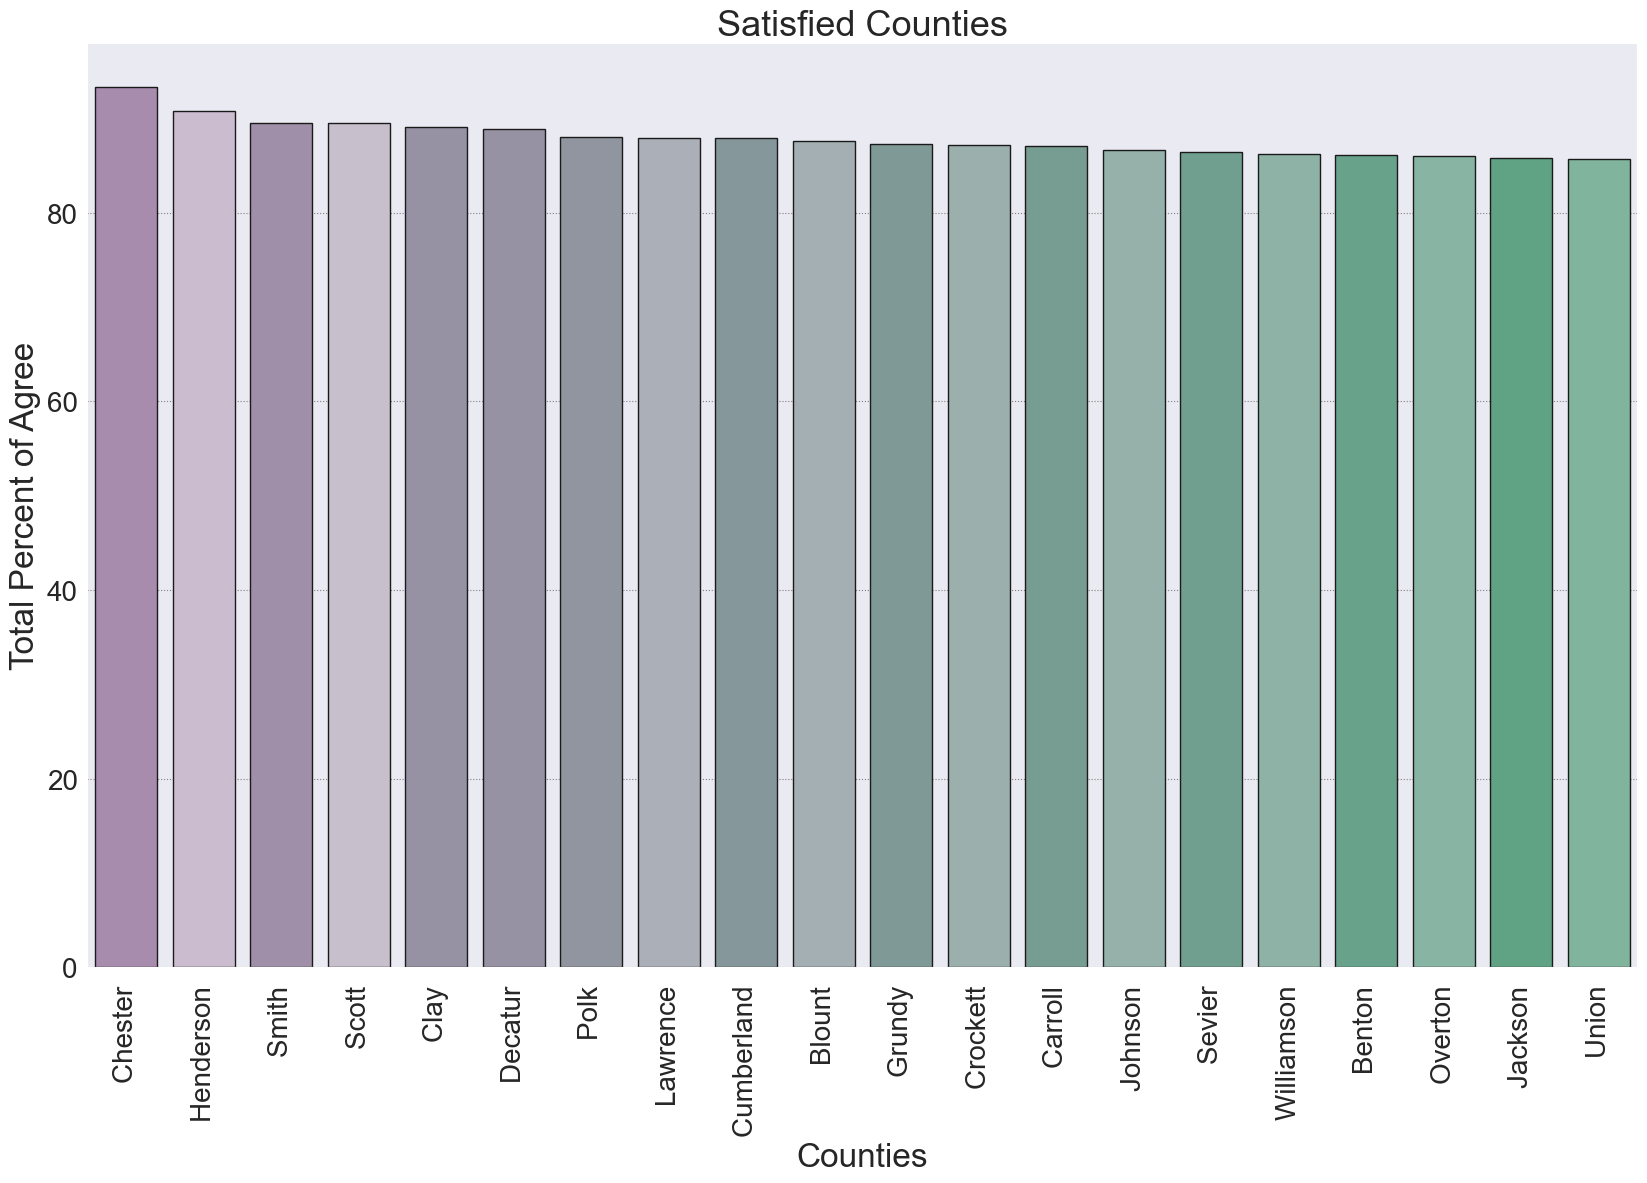

In [11]:
colors = ['#AB86B2', '#CEB9D2', '#A18BAD', '#C9BCD0', '#958EA6', '#958EA6', '#8D94A2', '#A9AEB9', '#83999E', '#A0B1B4',
          '#7B9D9A', '#98B3B0', '#71A295', '#90B6AC', '#68A691', '#88B9A8', '#5FAB8B', '#81BCA4', '#54AD85', '#77BD9E']

customPalette = sns.set_palette(sns.color_palette(colors))

plt.figure(figsize = (20, 12))                              
sns.set_style("darkgrid", {"grid.color":".5", "grid.linestyle": ":"})                                  
sns.barplot(x = 'County Name', 
            y = 'total_agree', 
            data = top_all_agree, 
            palette = customPalette,
            edgecolor = '.1')
plt.xlabel('Counties', fontsize=24)                                              
plt.ylabel('Total Percent of Agree', fontsize=24) 

plt.title('Satisfied Counties', fontsize=26)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('../data/sat_counties_original.png', bbox_inches="tight");

In [12]:
avg_str_agree = teacher_core_stats[['Strongly Agree', 'District', 'County Name']]
avg_str_agree

,Strongly Agree,District,County Name
0,38.0,Anderson County,Anderson
1,41.0,Anderson County,Anderson
2,50.0,Anderson County,Anderson
3,47.0,Anderson County,Anderson
4,42.0,Anderson County,Anderson
...,...,...,...
9495,NaN,Alvin C York Institute,Fentress
9496,NaN,Alvin C York Institute,Fentress
9497,NaN,Alvin C York Institute,Fentress
9498,NaN,Alvin C York Institute,Fentress


In [13]:
avg_str_agree.dtypes

Strongly Agree    float64
District           object
County Name        object
dtype: object

In [14]:
avg_str_agree = avg_str_agree.loc[(avg_str_agree['Strongly Agree'] > 1)]
avg_str_agree

,Strongly Agree,District,County Name
0,38.0,Anderson County,Anderson
1,41.0,Anderson County,Anderson
2,50.0,Anderson County,Anderson
3,47.0,Anderson County,Anderson
4,42.0,Anderson County,Anderson
...,...,...,...
9451,16.0,Alvin C York Institute,Fentress
9455,13.0,Alvin C York Institute,Fentress
9456,6.0,Alvin C York Institute,Fentress
9457,13.0,Alvin C York Institute,Fentress


In [15]:
avg_str_agree.columns = ['per_strongly_agree', 'district', 'county']
avg_str_agree

,per_strongly_agree,district,county
0,38.0,Anderson County,Anderson
1,41.0,Anderson County,Anderson
2,50.0,Anderson County,Anderson
3,47.0,Anderson County,Anderson
4,42.0,Anderson County,Anderson
...,...,...,...
9451,16.0,Alvin C York Institute,Fentress
9455,13.0,Alvin C York Institute,Fentress
9456,6.0,Alvin C York Institute,Fentress
9457,13.0,Alvin C York Institute,Fentress


In [16]:
avg_str_agree.describe()

,per_strongly_agree
count,3997.000000
mean,29.398299
std,11.223544
min,2.000000
25%,22.000000
50%,29.000000
75%,36.000000
max,80.000000


In [17]:
avg_str_agree_dist = avg_str_agree.groupby('county').mean()

avg_str_agree_dist = avg_str_agree_dist.reset_index()
avg_str_agree_dist

C:\Users\oxyje\AppData\Local\Temp\ipykernel_208436\1085314340.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_str_agree_dist = avg_str_agree.groupby('county').mean()


,county,per_strongly_agree
0,Anderson,34.843750
1,Bedford,28.593750
2,Benton,32.375000
3,Bledsoe,22.562500
4,Blount,34.312500
...,...,...
86,Wayne,31.000000
87,Weakley,27.437500
88,White,29.281250
89,Williamson,29.750000


In [18]:
avg_str_agree_dist = avg_str_agree_dist.sort_values('per_strongly_agree', ascending = False)

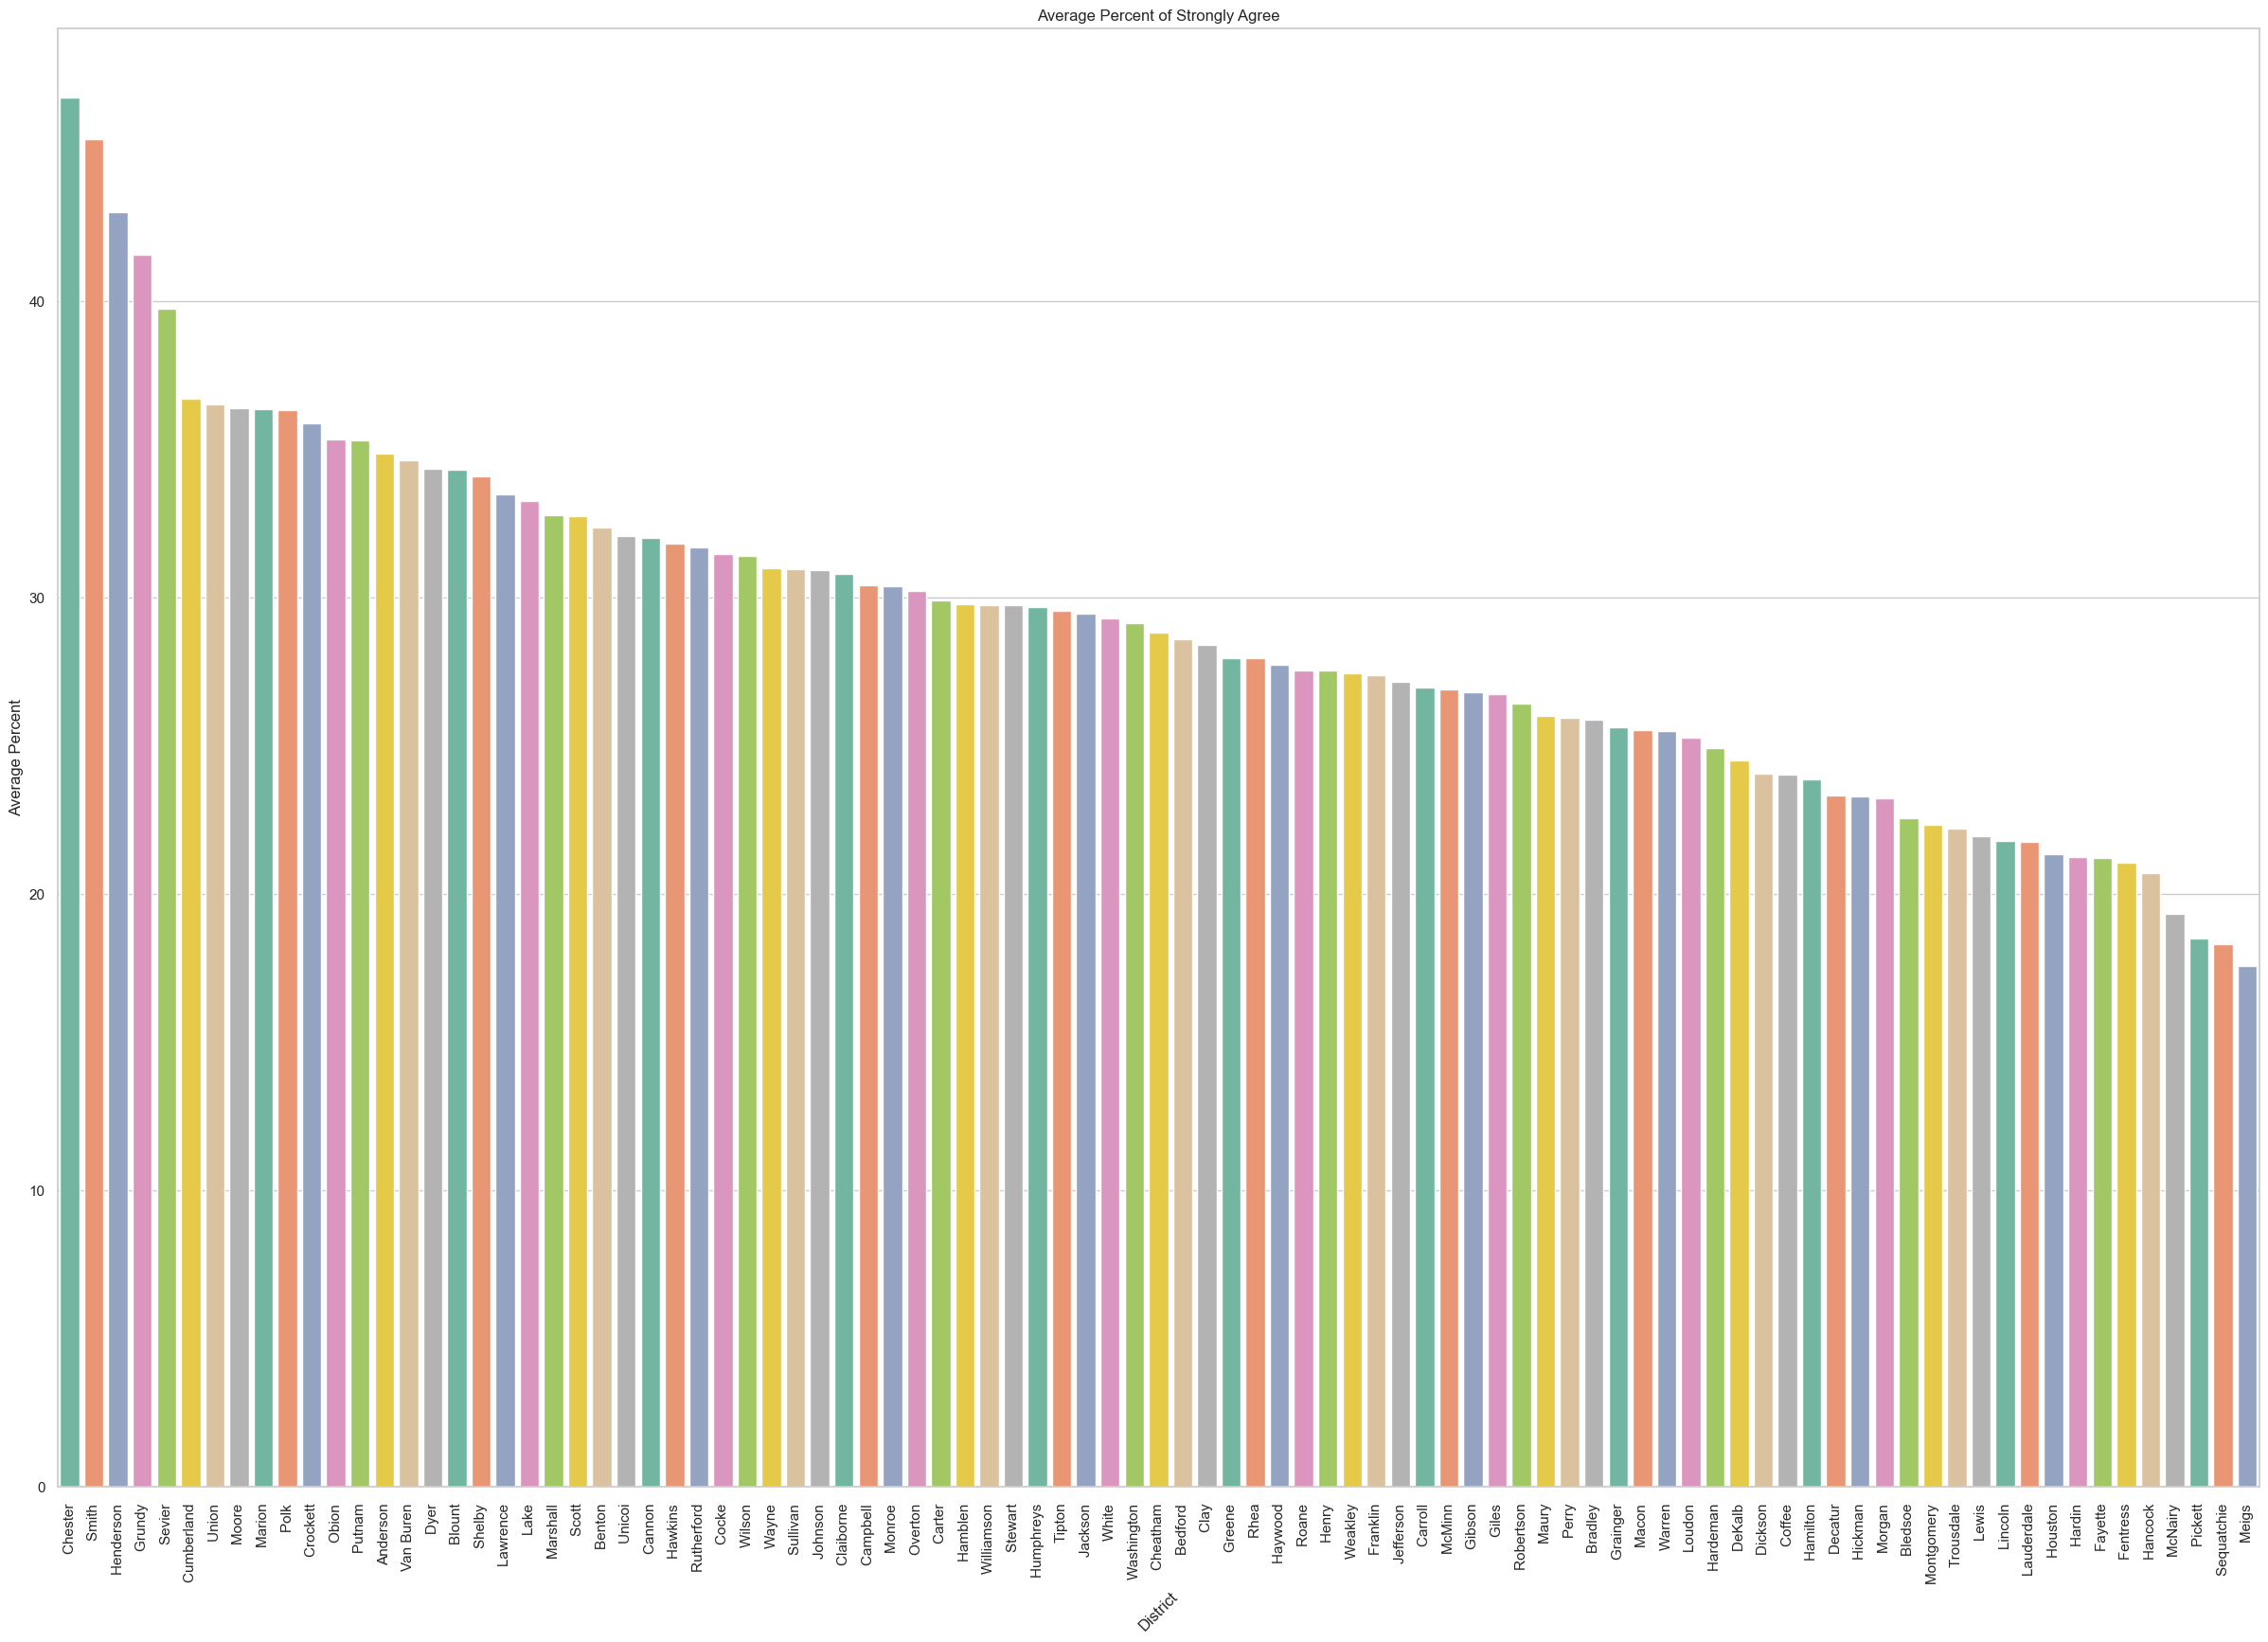

In [19]:
plt.figure(figsize = (30, 20))                              
sns.set(style="whitegrid")                                  
sns.barplot(x = 'county', 
            y = 'per_strongly_agree', 
            data = avg_str_agree_dist, 
            palette = 'Set2')
plt.xlabel('District', rotation = 45)                                              
plt.ylabel('Average Percent')                                              
plt.title('Average Percent of Strongly Agree')
plt.xticks(rotation=90);

In [20]:
top_avg_str_agree = avg_str_agree_dist.head(20)
top_avg_str_agree = top_avg_str_agree.reset_index()
top_avg_str_agree

,index,county,per_strongly_agree
0,11,Chester,46.875000
1,76,Smith,45.468750
2,37,Henderson,43.015625
3,29,Grundy,41.562500
4,74,Sevier,39.750000
5,17,Cumberland,36.718750
6,82,Union,36.531250
7,60,Moore,36.406250
8,52,Marion,36.375000
9,66,Polk,36.312500


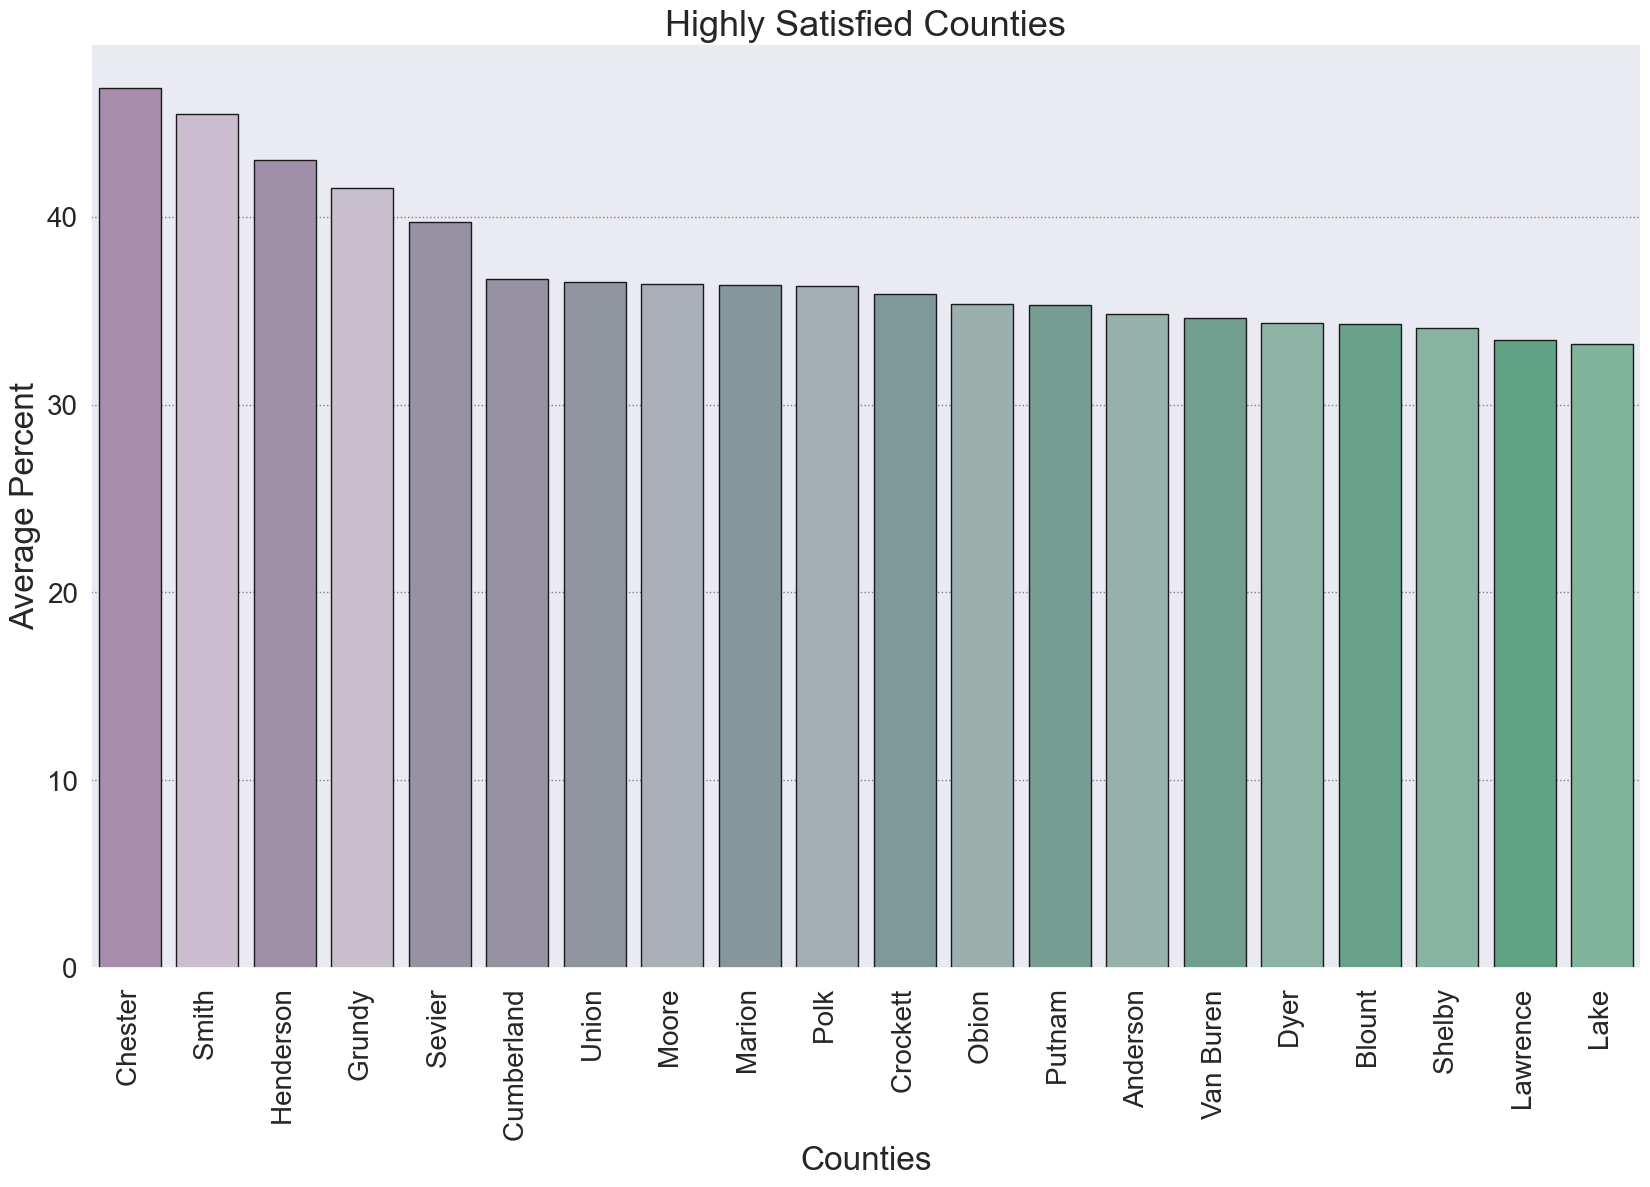

In [21]:
colors = ['#AB86B2', '#CEB9D2', '#A18BAD', '#C9BCD0', '#958EA6', '#958EA6', '#8D94A2', '#A9AEB9', '#83999E', '#A0B1B4',
          '#7B9D9A', '#98B3B0', '#71A295', '#90B6AC', '#68A691', '#88B9A8', '#5FAB8B', '#81BCA4', '#54AD85', '#77BD9E']

customPalette = sns.set_palette(sns.color_palette(colors))

plt.figure(figsize = (20, 12))                              
sns.set_style("darkgrid", {"grid.color":".5", "grid.linestyle": ":"})                                  
sns.barplot(x = 'county', 
            y = 'per_strongly_agree', 
            data = top_avg_str_agree, 
            palette = customPalette,
            edgecolor = '.1')
plt.xlabel('Counties', fontsize=24)                                              
plt.ylabel('Average Percent', fontsize=24) 

plt.title('Highly Satisfied Counties', fontsize=26)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('../data/high_sat_counties_original.png', bbox_inches="tight");

In [22]:
avg_str_dis = teacher_core_stats[['Strongly Disagree', 'District']]
avg_str_dis

,Strongly Disagree,District
0,4.0,Anderson County
1,5.0,Anderson County
2,3.0,Anderson County
3,2.0,Anderson County
4,4.0,Anderson County
...,...,...
9495,NaN,Alvin C York Institute
9496,NaN,Alvin C York Institute
9497,NaN,Alvin C York Institute
9498,NaN,Alvin C York Institute


In [23]:
avg_str_dis.dtypes

Strongly Disagree    float64
District              object
dtype: object

In [24]:
avg_str_dis = avg_str_dis.loc[(avg_str_dis['Strongly Disagree'] > 1)]
avg_str_dis

,Strongly Disagree,District
0,4.0,Anderson County
1,5.0,Anderson County
2,3.0,Anderson County
3,2.0,Anderson County
4,4.0,Anderson County
...,...,...
9441,3.0,Alvin C York Institute
9448,3.0,Alvin C York Institute
9449,16.0,Alvin C York Institute
9457,6.0,Alvin C York Institute


In [25]:
avg_str_dis.columns = ['per_strongly_dis', 'district']
avg_str_dis

,per_strongly_dis,district
0,4.0,Anderson County
1,5.0,Anderson County
2,3.0,Anderson County
3,2.0,Anderson County
4,4.0,Anderson County
...,...,...
9441,3.0,Alvin C York Institute
9448,3.0,Alvin C York Institute
9449,16.0,Alvin C York Institute
9457,6.0,Alvin C York Institute


In [26]:
avg_str_dis_dist = avg_str_dis.groupby('district').mean()

avg_str_dis_dist = avg_str_dis_dist.reset_index()

In [27]:
avg_str_dis_dist = avg_str_dis_dist.sort_values('per_strongly_dis', ascending = False)

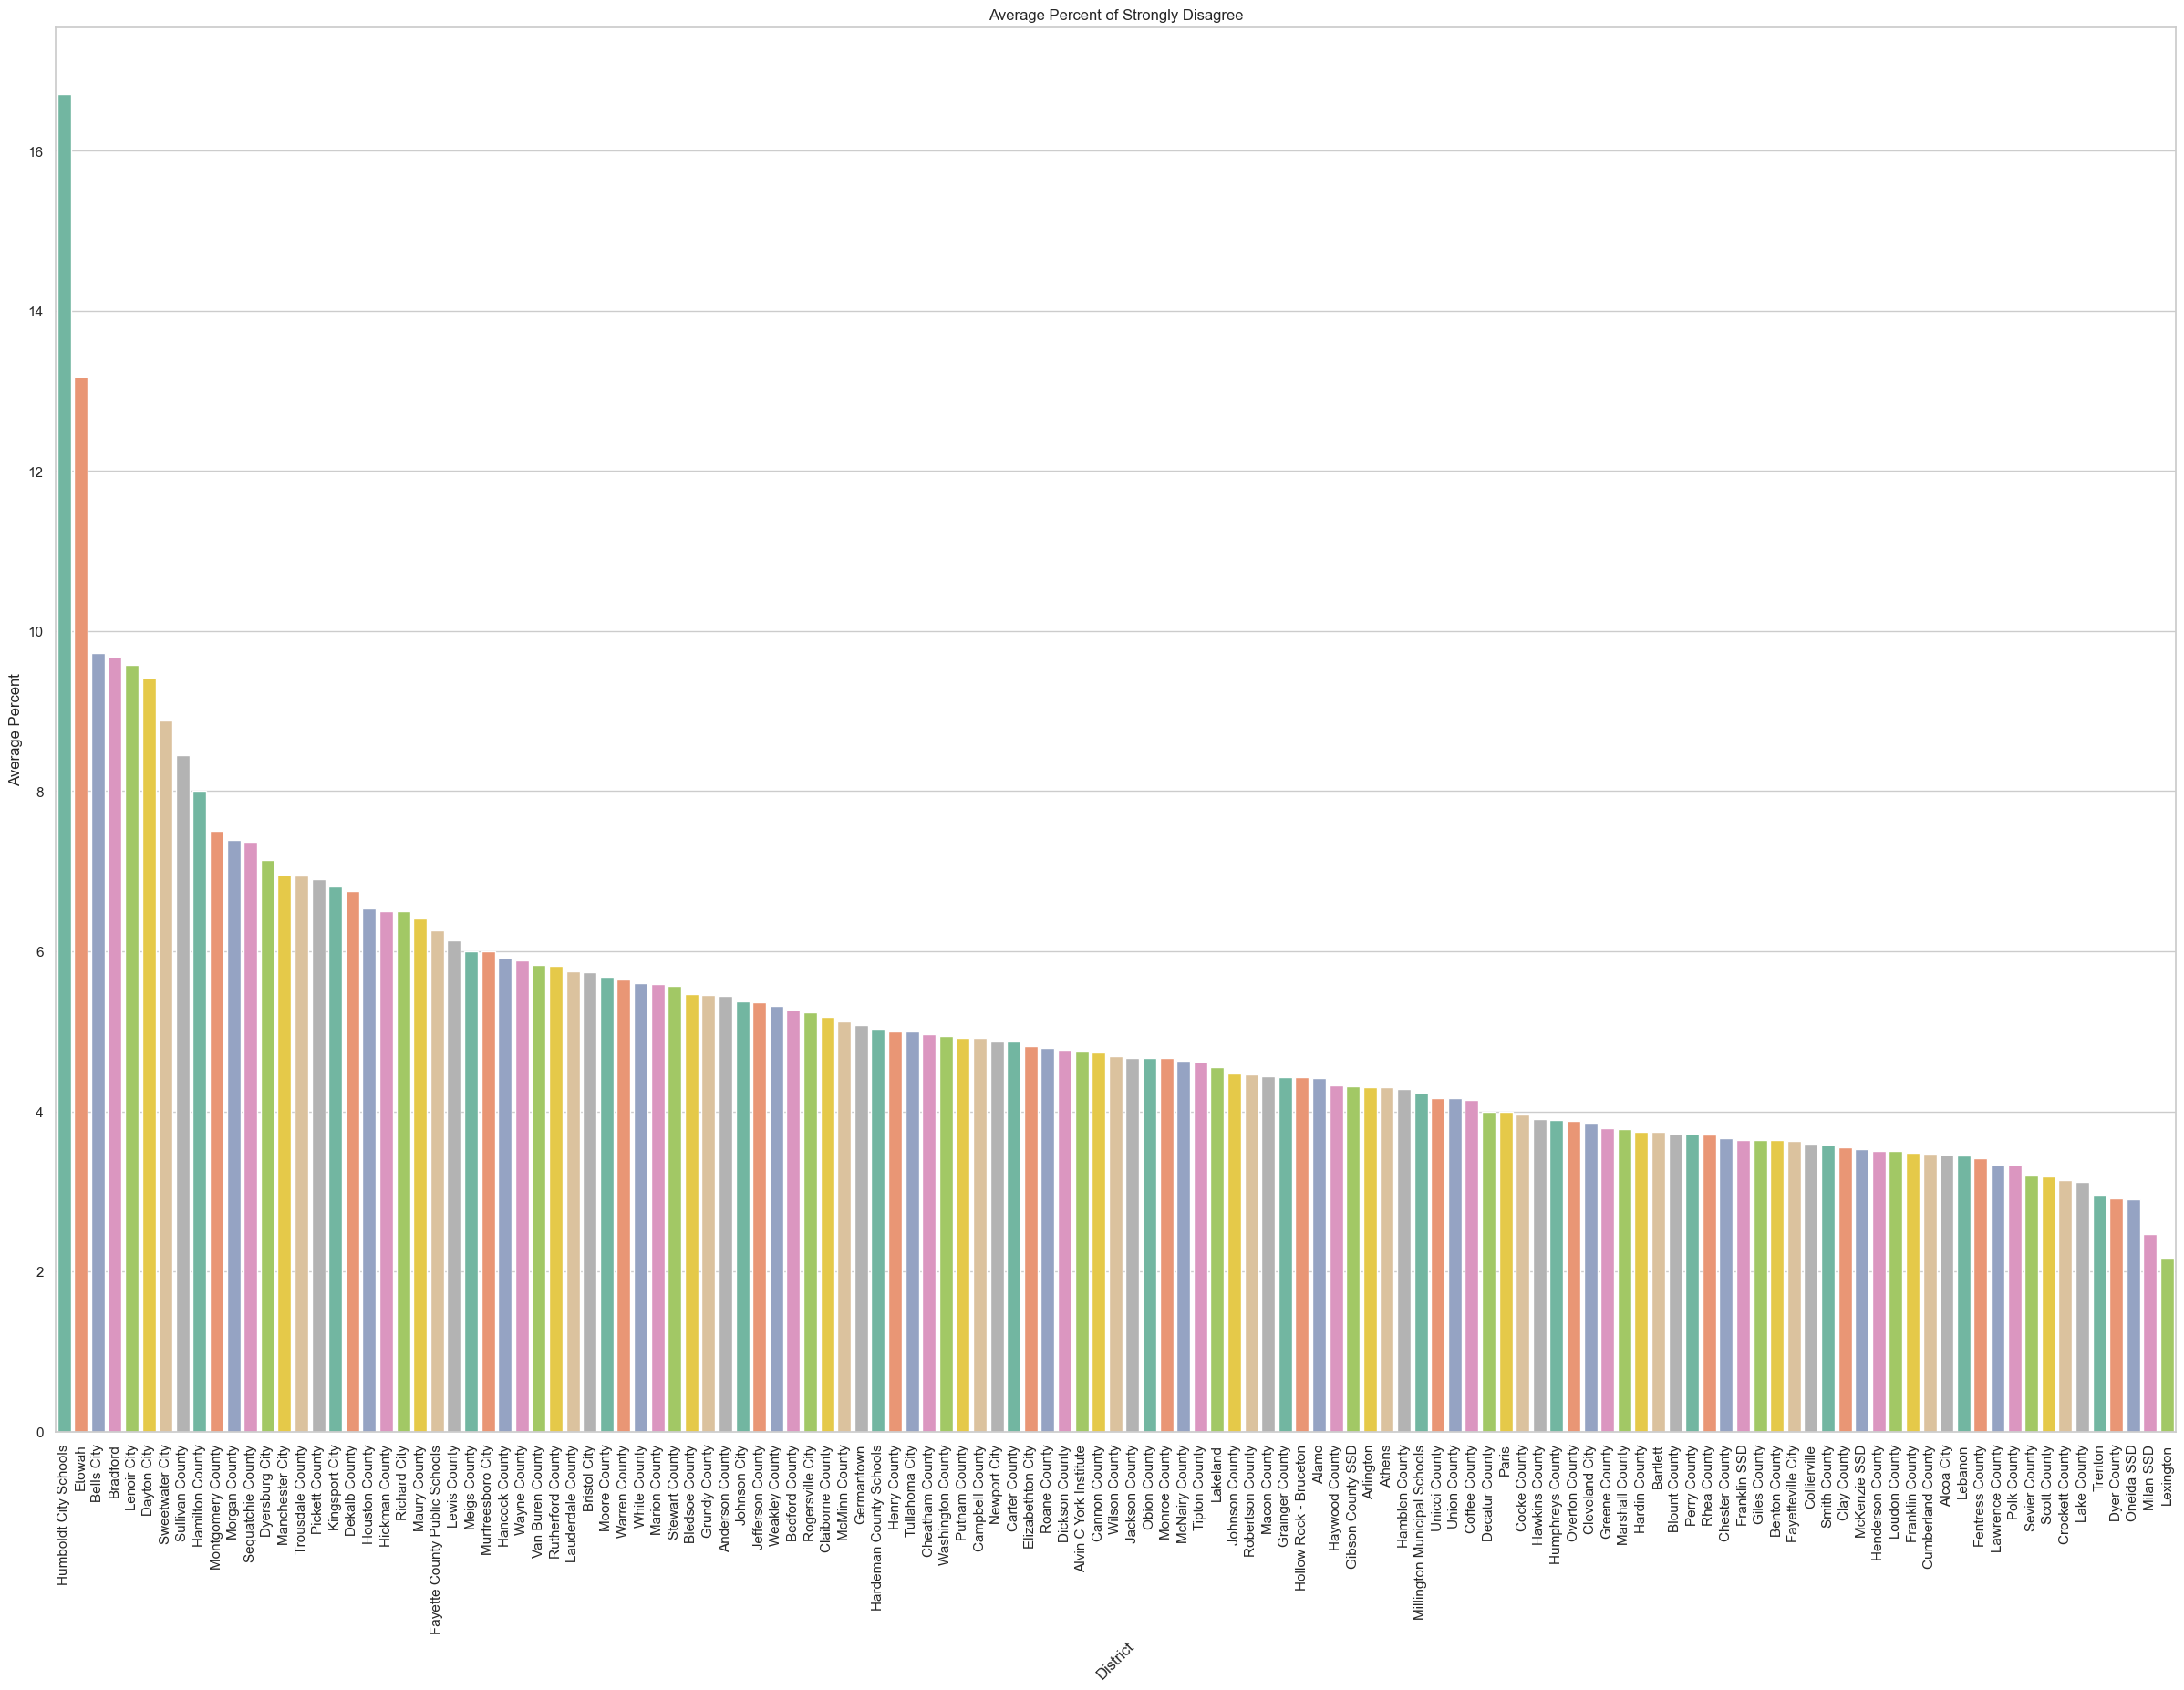

In [28]:
plt.figure(figsize = (30, 20))                              
sns.set(style="whitegrid")                                  
sns.barplot(x = 'district', 
            y = 'per_strongly_dis', 
            data = avg_str_dis_dist, 
            palette = 'Set2')
plt.xlabel('District', rotation = 45)                                              
plt.ylabel('Average Percent')                                              
plt.title('Average Percent of Strongly Disagree')
plt.xticks(rotation=90);

In [29]:
top_str_dis = avg_str_dis_dist.head(24)
top_str_dis

,district,per_strongly_dis
58,Humboldt City Schools,16.709677
34,Etowah,13.173913
8,Bells City,9.727273
12,Bradford,9.684211
70,Lenoir City,9.583333
27,Dayton City,9.416667
111,Sweetwater City,8.884615
110,Sullivan County,8.444444
47,Hamilton County,8.000000
86,Montgomery County,7.500000


In [30]:
scores = pd.read_excel('../data/district_assessment_file_suppressed_upd32323.xlsx')
scores

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,2022,10,Anderson County,EOC,Algebra I,10,All Students,99,79,78,77,**,**,**,**,**,**,**,**,1.3
1,2022,10,Anderson County,EOC,Algebra I,10,American Indian or Alaska Native,*,1,1,1,*,*,*,*,*,*,*,*,*
2,2022,10,Anderson County,EOC,Algebra I,10,Black or African American,*,2,2,2,*,*,*,*,*,*,*,*,*
3,2022,10,Anderson County,EOC,Algebra I,10,Black/Hispanic/Native American,*,10,10,9,*,*,*,*,*,*,*,*,*
4,2022,10,Anderson County,EOC,Algebra I,10,Economically Disadvantaged,97,34,33,33,**,**,**,**,**,**,**,**,**
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167626,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-English Learners/Transitional 1-4,99,77,76,76,**,**,**,**,**,**,**,**,6.6
167627,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-Students with Disabilities,99,82,81,78,**,**,**,**,**,**,**,**,7.7
167628,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Students with Disabilities,*,7,7,7,*,*,*,*,*,*,*,*,*
167629,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Super Subgroup,99,85,84,81,**,**,**,**,**,**,**,**,6.2


In [31]:
dist_scores_percent = scores.loc[(scores.grade == 'All Grades')]
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
69,2022,10,Anderson County,EOC,Algebra I,All Grades,All Students,99,633,626,616,322,140,133,21,52.3,22.7,21.6,3.4,25
70,2022,10,Anderson County,EOC,Algebra I,All Grades,American Indian or Alaska Native,*,3,3,3,*,*,*,*,*,*,*,*,*
71,2022,10,Anderson County,EOC,Algebra I,All Grades,Asian,*,9,9,9,*,*,*,*,*,*,*,*,*
72,2022,10,Anderson County,EOC,Algebra I,All Grades,Black or African American,100,21,21,21,**,**,**,**,**,**,**,**,9.5
73,2022,10,Anderson County,EOC,Algebra I,All Grades,Black/Hispanic/Native American,96,52,50,40,26,8,4,2,65,20,10,5,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167626,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-English Learners/Transitional 1-4,99,77,76,76,**,**,**,**,**,**,**,**,6.6
167627,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-Students with Disabilities,99,82,81,78,**,**,**,**,**,**,**,**,7.7
167628,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Students with Disabilities,*,7,7,7,*,*,*,*,*,*,*,*,*
167629,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Super Subgroup,99,85,84,81,**,**,**,**,**,**,**,**,6.2


In [32]:
dist_scores_percent = dist_scores_percent.loc[(dist_scores_percent.student_group == 'All Students')]
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
69,2022,10,Anderson County,EOC,Algebra I,All Grades,All Students,99,633,626,616,322,140,133,21,52.3,22.7,21.6,3.4,25
155,2022,10,Anderson County,EOC,Algebra II,All Grades,All Students,98,472,463,463,186,126,137,14,40.2,27.2,29.6,3,32.6
249,2022,10,Anderson County,EOC,Biology I,All Grades,All Students,99,545,537,535,114,204,194,23,21.3,38.1,36.3,4.3,40.6
250,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,Biology I,All Grades,All Students,*,8,8,8,*,*,*,*,*,*,*,*,*
490,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,ELA,All Grades,All Students,85,53,45,45,12,7,18,8,26.6,15.6,40,17.8,57.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167442,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,Science,All Grades,All Students,*,2,2,2,*,*,*,*,*,*,*,*,*
167443,2022,987,Tennessee Public Charter School Commission,TNReady,Science,All Grades,All Students,99,634,629,620,134,290,182,14,21.5,46.8,29.4,2.3,31.6
167532,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,Social Studies,All Grades,All Students,*,2,2,2,*,*,*,*,*,*,*,*,*
167533,2022,987,Tennessee Public Charter School Commission,TNReady,Social Studies,All Grades,All Students,100,259,258,256,**,**,**,**,**,**,**,**,29.7


In [33]:
dist_scores_percent = dist_scores_percent.loc[(dist_scores_percent.subject == 'ELA')|(dist_scores_percent.subject == 'Math')]
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
490,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,ELA,All Grades,All Students,85,53,45,45,12,7,18,8,26.6,15.6,40,17.8,57.8
491,2022,10,Anderson County,TNReady,ELA,All Grades,All Students,98,2731,2674,2667,725,1148,639,155,27.2,43,24,5.8,29.8
930,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,Math,All Grades,All Students,85,53,45,45,6,14,23,2,13.4,31.1,51.1,4.4,55.6
931,2022,10,Anderson County,TNReady,Math,All Grades,All Students,98,2611,2551,2544,886,941,548,169,34.9,37,21.5,6.6,28.2
1451,2022,11,Clinton,MSAA/Alt-Science/Social Studies,ELA,All Grades,All Students,*,2,2,2,*,*,*,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166107,2022,985,Achievement School District,TNReady,Math,All Grades,All Students,96,4824,4616,4551,**,**,**,**,**,**,**,**,6.1
166941,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,ELA,All Grades,All Students,*,4,4,4,*,*,*,*,*,*,*,*,*
166942,2022,987,Tennessee Public Charter School Commission,TNReady,ELA,All Grades,All Students,99,634,628,620,147,259,178,36,23.7,41.8,28.7,5.8,34.5
167295,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,Math,All Grades,All Students,*,4,4,4,*,*,*,*,*,*,*,*,*


In [34]:
dist_scores_percent = dist_scores_percent.loc[(dist_scores_percent.test == 'TNReady')]
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
491,2022,10,Anderson County,TNReady,ELA,All Grades,All Students,98,2731,2674,2667,725,1148,639,155,27.2,43,24,5.8,29.8
931,2022,10,Anderson County,TNReady,Math,All Grades,All Students,98,2611,2551,2544,886,941,548,169,34.9,37,21.5,6.6,28.2
1452,2022,11,Clinton,TNReady,ELA,All Grades,All Students,99,504,501,497,76,174,167,80,15.3,35,33.6,16.1,49.7
1565,2022,11,Clinton,TNReady,Math,All Grades,All Students,98,504,496,492,92,160,180,60,18.7,32.5,36.6,12.2,48.8
2259,2022,12,Oak Ridge,TNReady,ELA,All Grades,All Students,98,2050,2011,2004,338,795,648,223,16.9,39.7,32.3,11.1,43.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165084,2022,970,Department Of Children's Services Education Di...,TNReady,Math,All Grades,All Students,*,2,0,0,*,*,*,*,*,*,*,*,*
165618,2022,985,Achievement School District,TNReady,ELA,All Grades,All Students,96,4837,4621,4557,2553,1604,353,47,56.1,35.2,7.7,1,8.8
166107,2022,985,Achievement School District,TNReady,Math,All Grades,All Students,96,4824,4616,4551,**,**,**,**,**,**,**,**,6.1
166942,2022,987,Tennessee Public Charter School Commission,TNReady,ELA,All Grades,All Students,99,634,628,620,147,259,178,36,23.7,41.8,28.7,5.8,34.5


In [35]:
dist_scores_percent = pd.merge(dist_scores_percent, district_numbers, left_on= 'system', right_on='District Number', how = 'left')
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,...,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded,County Number,County Name,District Number
0,2022,10,Anderson County,TNReady,ELA,All Grades,All Students,98,2731,2674,...,639,155,27.2,43,24,5.8,29.8,1.0,Anderson County,10.0
1,2022,10,Anderson County,TNReady,Math,All Grades,All Students,98,2611,2551,...,548,169,34.9,37,21.5,6.6,28.2,1.0,Anderson County,10.0
2,2022,11,Clinton,TNReady,ELA,All Grades,All Students,99,504,501,...,167,80,15.3,35,33.6,16.1,49.7,1.0,Anderson County,11.0
3,2022,11,Clinton,TNReady,Math,All Grades,All Students,98,504,496,...,180,60,18.7,32.5,36.6,12.2,48.8,1.0,Anderson County,11.0
4,2022,12,Oak Ridge,TNReady,ELA,All Grades,All Students,98,2050,2011,...,648,223,16.9,39.7,32.3,11.1,43.5,1.0,Anderson County,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022,970,Department Of Children's Services Education Di...,TNReady,Math,All Grades,All Students,*,2,0,...,*,*,*,*,*,*,*,NaN,NaN,NaN
288,2022,985,Achievement School District,TNReady,ELA,All Grades,All Students,96,4837,4621,...,353,47,56.1,35.2,7.7,1,8.8,157.0,Shelby County,985.0
289,2022,985,Achievement School District,TNReady,Math,All Grades,All Students,96,4824,4616,...,**,**,**,**,**,**,6.1,157.0,Shelby County,985.0
290,2022,987,Tennessee Public Charter School Commission,TNReady,ELA,All Grades,All Students,99,634,628,...,178,36,23.7,41.8,28.7,5.8,34.5,NaN,NaN,NaN


In [36]:
dist_scores_percent = dist_scores_percent[['system_name','system', 'subject', 'pct_below', 'pct_approaching', 'pct_met_expectations', 'pct_exceeded_expectations', 'pct_met_exceeded', 'County Name']]

In [37]:
dist_scores_percent

,system_name,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded,County Name
0,Anderson County,10,ELA,27.2,43,24,5.8,29.8,Anderson County
1,Anderson County,10,Math,34.9,37,21.5,6.6,28.2,Anderson County
2,Clinton,11,ELA,15.3,35,33.6,16.1,49.7,Anderson County
3,Clinton,11,Math,18.7,32.5,36.6,12.2,48.8,Anderson County
4,Oak Ridge,12,ELA,16.9,39.7,32.3,11.1,43.5,Anderson County
...,...,...,...,...,...,...,...,...,...
287,Department Of Children's Services Education Di...,970,Math,*,*,*,*,*,NaN
288,Achievement School District,985,ELA,56.1,35.2,7.7,1,8.8,Shelby County
289,Achievement School District,985,Math,**,**,**,**,6.1,Shelby County
290,Tennessee Public Charter School Commission,987,ELA,23.7,41.8,28.7,5.8,34.5,NaN


In [38]:
dist_scores_percent = dist_scores_percent.rename (columns = {'system_name':'district', 'County Name':'county'})
dist_scores_percent

,district,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded,county
0,Anderson County,10,ELA,27.2,43,24,5.8,29.8,Anderson County
1,Anderson County,10,Math,34.9,37,21.5,6.6,28.2,Anderson County
2,Clinton,11,ELA,15.3,35,33.6,16.1,49.7,Anderson County
3,Clinton,11,Math,18.7,32.5,36.6,12.2,48.8,Anderson County
4,Oak Ridge,12,ELA,16.9,39.7,32.3,11.1,43.5,Anderson County
...,...,...,...,...,...,...,...,...,...
287,Department Of Children's Services Education Di...,970,Math,*,*,*,*,*,NaN
288,Achievement School District,985,ELA,56.1,35.2,7.7,1,8.8,Shelby County
289,Achievement School District,985,Math,**,**,**,**,6.1,Shelby County
290,Tennessee Public Charter School Commission,987,ELA,23.7,41.8,28.7,5.8,34.5,NaN


In [39]:
dist_scores_percent['county'] = dist_scores_percent['county'].str.replace('County', '')
dist_scores_percent

,district,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded,county
0,Anderson County,10,ELA,27.2,43,24,5.8,29.8,Anderson
1,Anderson County,10,Math,34.9,37,21.5,6.6,28.2,Anderson
2,Clinton,11,ELA,15.3,35,33.6,16.1,49.7,Anderson
3,Clinton,11,Math,18.7,32.5,36.6,12.2,48.8,Anderson
4,Oak Ridge,12,ELA,16.9,39.7,32.3,11.1,43.5,Anderson
...,...,...,...,...,...,...,...,...,...
287,Department Of Children's Services Education Di...,970,Math,*,*,*,*,*,NaN
288,Achievement School District,985,ELA,56.1,35.2,7.7,1,8.8,Shelby
289,Achievement School District,985,Math,**,**,**,**,6.1,Shelby
290,Tennessee Public Charter School Commission,987,ELA,23.7,41.8,28.7,5.8,34.5,NaN


In [40]:
dist_scores_percent.to_csv('../data/dist_scores_percent.csv')

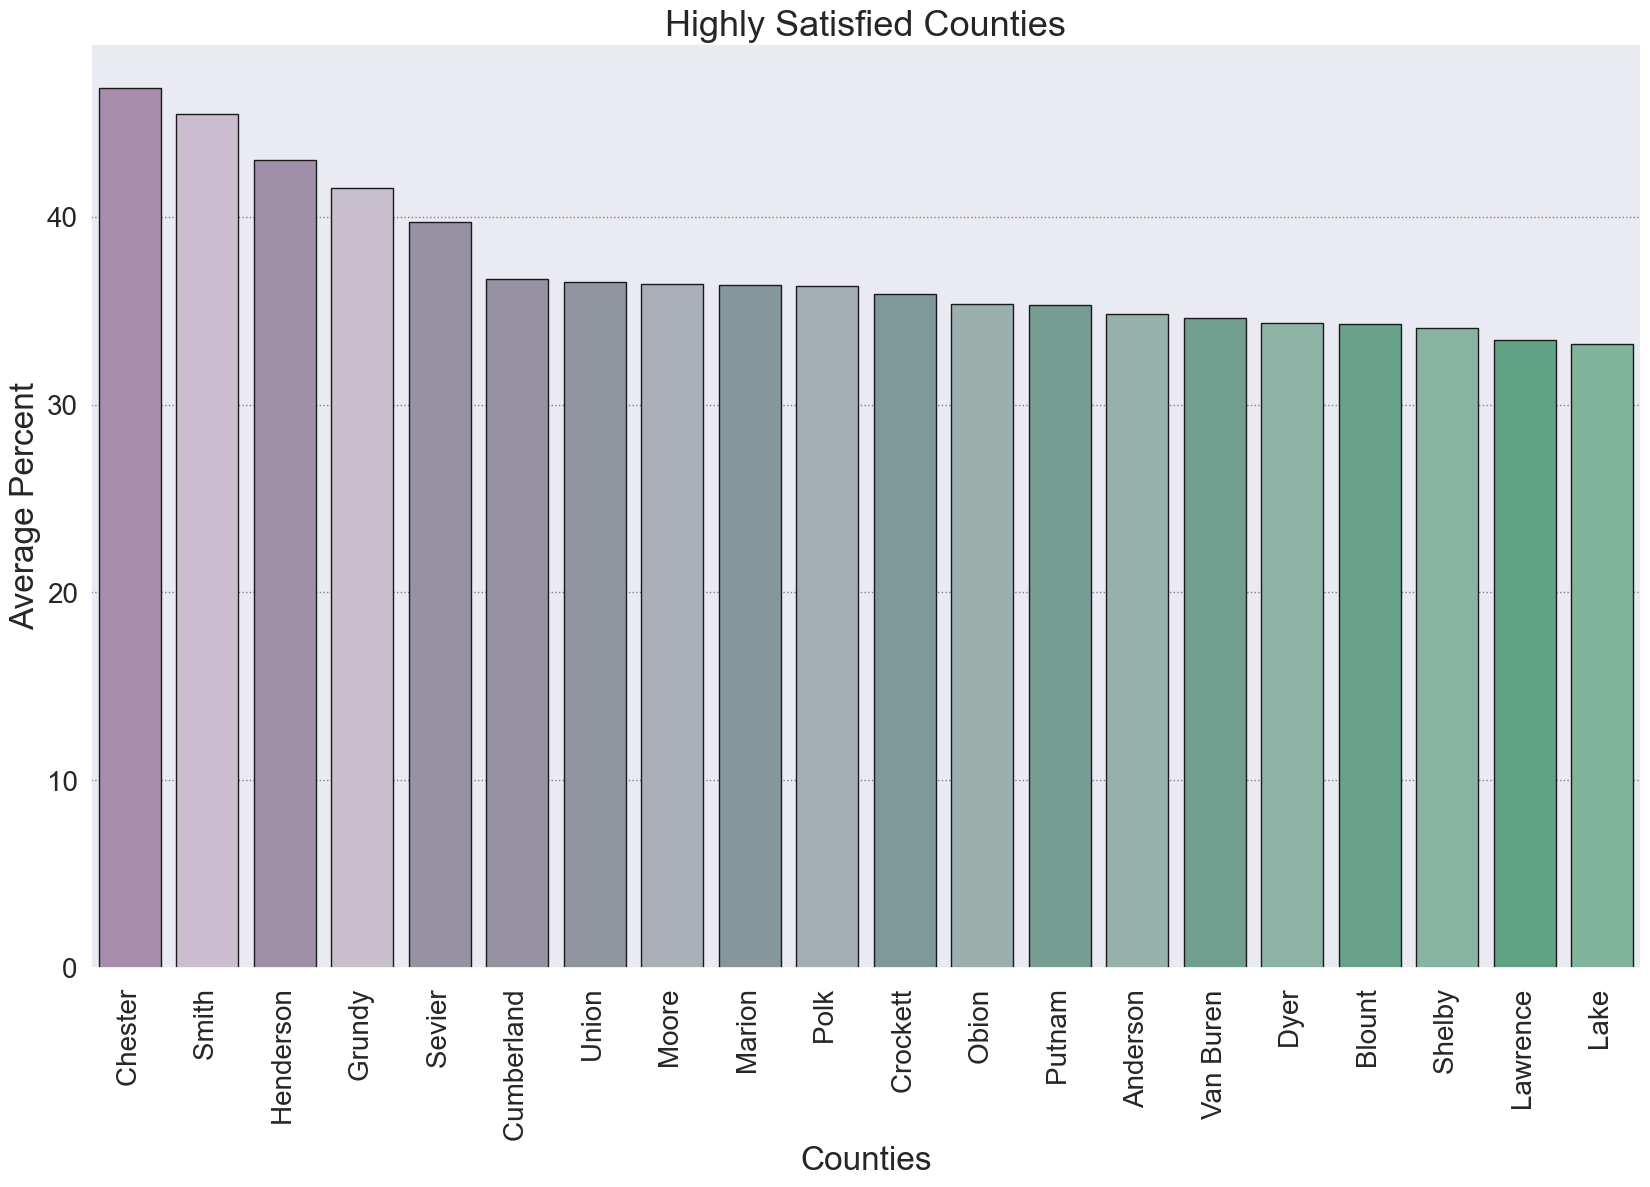

In [41]:
colors = ['#AB86B2', '#CEB9D2', '#A18BAD', '#C9BCD0', '#958EA6', '#958EA6', '#8D94A2', '#A9AEB9', '#83999E', '#A0B1B4',
          '#7B9D9A', '#98B3B0', '#71A295', '#90B6AC', '#68A691', '#88B9A8', '#5FAB8B', '#81BCA4', '#54AD85', '#77BD9E']

customPalette = sns.set_palette(sns.color_palette(colors))

plt.figure(figsize = (20, 12))                              
sns.set_style("darkgrid", {"grid.color":".5", "grid.linestyle": ":"})                                  
sns.barplot(x = 'county', 
            y = 'per_strongly_agree', 
            data = top_avg_str_agree, 
            palette = customPalette,
            edgecolor = '.1')
plt.xlabel('Counties', fontsize=24)                                              
plt.ylabel('Average Percent', fontsize=24) 

plt.title('Highly Satisfied Counties', fontsize=26)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('../data/high_sat_counties_original.png', bbox_inches="tight");

In [42]:
met_ex_scores = dist_scores_percent[['county', 'pct_met_exceeded']].reset_index()
met_ex_scores['pct_met_exceeded'] = met_ex_scores['pct_met_exceeded'].str.replace('*', '0').astype(float)

C:\Users\oxyje\AppData\Local\Temp\ipykernel_208436\4223003685.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  met_ex_scores['pct_met_exceeded'] = met_ex_scores['pct_met_exceeded'].str.replace('*', '0').astype(float)


In [43]:
top_all_agree = top_all_agree.rename(columns = {'County Name': 'county', 'Strongly Agree': 'str_agree', 'Agree': 'agree'})

In [44]:
met_ex_scores = met_ex_scores.groupby('county').mean().reset_index()

In [45]:
top_agree_scores = pd.merge(top_all_agree, met_ex_scores, on = 'county', how = 'left').reset_index()
top_agree_scores = top_agree_scores[['county', 'total_agree', 'pct_met_exceeded']].reset_index()
top_agree_scores

,index,county,total_agree,pct_met_exceeded
0,0,Chester,93.28,46.500000
1,1,Henderson,90.72,39.350000
2,2,Smith,89.47,39.950000
3,3,Scott,89.45,28.825000
4,4,Clay,89.12,30.450000
5,5,Decatur,88.91,45.050000
6,6,Polk,88.03,37.400000
7,7,Lawrence,87.94,35.000000
8,8,Cumberland,87.94,33.500000
9,9,Blount,87.64,44.366667


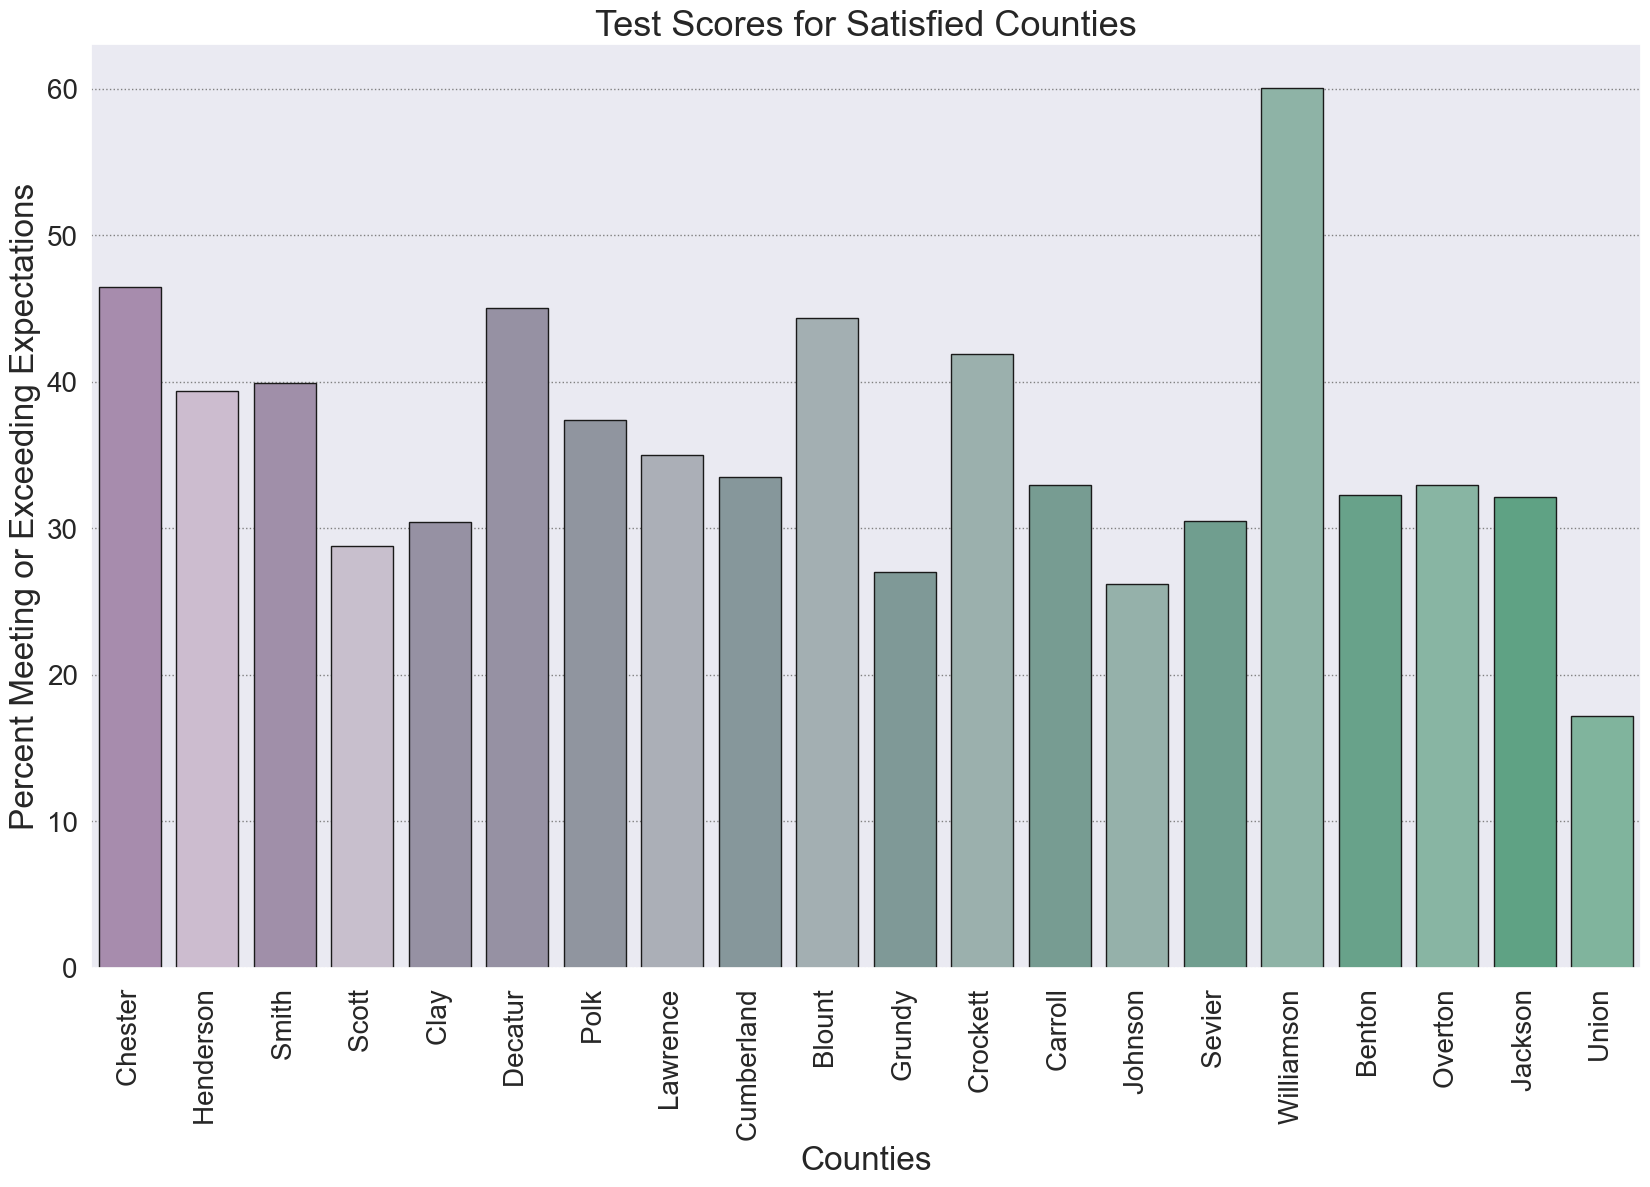

In [46]:
colors = ['#AB86B2', '#CEB9D2', '#A18BAD', '#C9BCD0', '#958EA6', '#958EA6', '#8D94A2', '#A9AEB9', '#83999E', '#A0B1B4',
          '#7B9D9A', '#98B3B0', '#71A295', '#90B6AC', '#68A691', '#88B9A8', '#5FAB8B', '#81BCA4', '#54AD85', '#77BD9E']

customPalette = sns.set_palette(sns.color_palette(colors))


plt.figure(figsize = (20, 12))                              
sns.set_style("darkgrid", {"grid.color":".5", "grid.linestyle": ":"})                                  
sns.barplot(x = 'county', 
            y = 'pct_met_exceeded', 
            data = top_agree_scores, 
            palette = customPalette,
            edgecolor = '.1')
plt.xlabel('Counties', fontsize=24)                                              
plt.ylabel('Percent Meeting or Exceeding Expectations', fontsize=24) 

plt.title('Test Scores for Satisfied Counties', fontsize=26)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('../data/scores_sat_counties_scores.png', bbox_inches="tight");

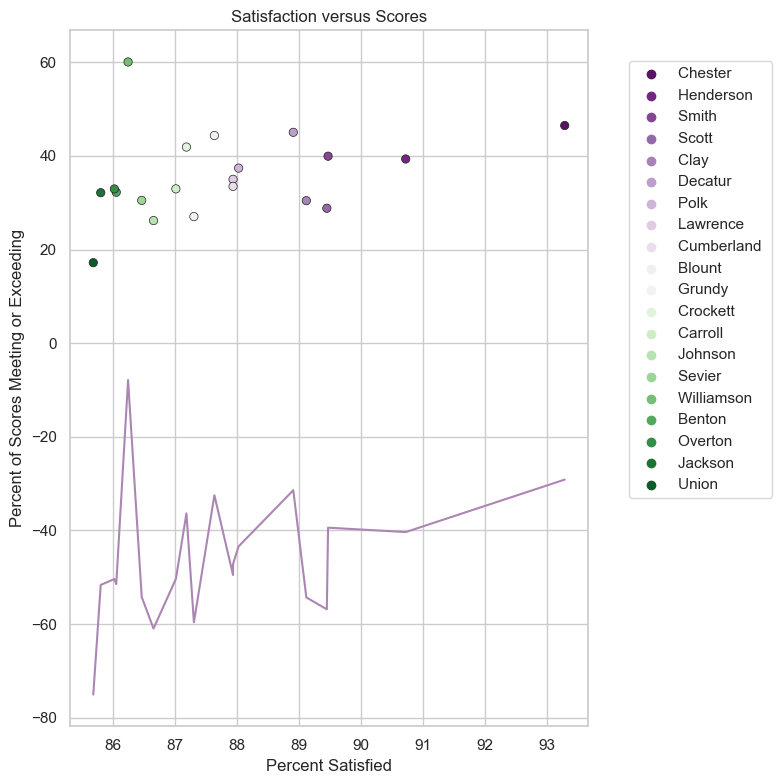

In [47]:
colors = ['#AB86B2', '#CEB9D2', '#A18BAD', '#C9BCD0', '#958EA6', '#958EA6', '#8D94A2', '#A9AEB9', '#83999E', '#A0B1B4',
          '#7B9D9A', '#98B3B0', '#71A295', '#90B6AC', '#68A691', '#88B9A8', '#5FAB8B', '#81BCA4', '#54AD85', '#77BD9E']

customPalette = sns.set_palette(sns.color_palette(colors))

plt.figure(figsize = (8, 8))                              
sns.set(style="whitegrid")                                  
sns.scatterplot(x = 'total_agree', 
            y = 'pct_met_exceeded', 
            data = top_agree_scores, 
            palette = 'PRGn',
                hue = 'county',
                edgecolor = '.1')
plt.xlabel('Percent Satisfied')                                              
plt.ylabel('Percent of Scores Meeting or Exceeding')                                              
plt.title('Satisfaction versus Scores')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2)

z = np.polyfit(top_agree_scores['total_agree'], top_agree_scores['pct_met_exceeded'], 1)
p = np.poly1d(z)
plt.plot(top_agree_scores['total_agree'],p(top_agree_scores['pct_met_exceeded']),"#AB86B2")


plt.tight_layout()
plt.savefig('../data/scatter_sat_counties_and_scores.png');

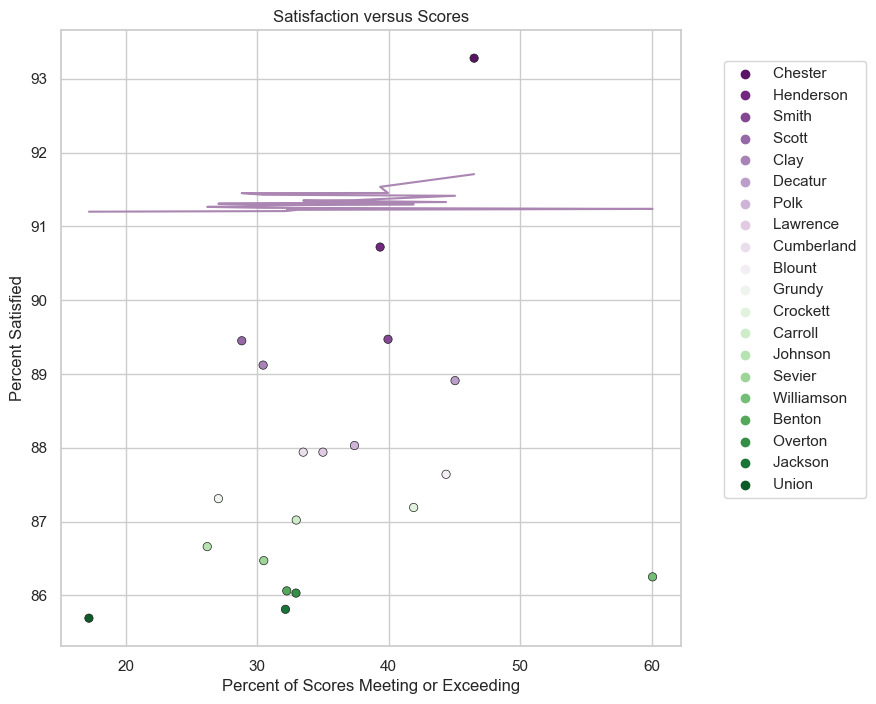

In [128]:
colors = ['#AB86B2', '#CEB9D2', '#A18BAD', '#C9BCD0', '#958EA6', '#958EA6', '#8D94A2', '#A9AEB9', '#83999E', '#A0B1B4',
          '#7B9D9A', '#98B3B0', '#71A295', '#90B6AC', '#68A691', '#88B9A8', '#5FAB8B', '#81BCA4', '#54AD85', '#77BD9E']

customPalette = sns.set_palette(sns.color_palette(colors))

plt.figure(figsize = (8, 8))                              
sns.set(style="whitegrid")                                  
sns.scatterplot(y = 'total_agree', 
            x = 'pct_met_exceeded', 
            data = top_agree_scores, 
            palette = 'PRGn',
                hue = 'county',
                edgecolor = '.1')
plt.ylabel('Percent Satisfied')                                              
plt.xlabel('Percent of Scores Meeting or Exceeding')                                              
plt.title('Satisfaction versus Scores')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2)

z = np.polyfit(top_agree_scores['pct_met_exceeded'], top_agree_scores['total_agree'], 1)
p = np.poly1d(z)
plt.plot(top_agree_scores['pct_met_exceeded'],p(top_agree_scores['total_agree']),"#AB86B2")




In [48]:
top_sat_scores = pd.merge(top_avg_str_agree, dist_scores_percent, on = 'county', how = 'left').dropna()
top_sat_scores 

,index,county,per_strongly_agree,district,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,11,Chester,46.875000,Chester County,120,ELA,15.6,40.8,34.1,9.5,43.6
1,11,Chester,46.875000,Chester County,120,Math,17.1,33.5,35.8,13.6,49.4
2,76,Smith,45.468750,Smith County,800,ELA,15.9,43.7,32.8,7.6,40.4
3,76,Smith,45.468750,Smith County,800,Math,21.2,39.3,30.8,8.7,39.5
4,37,Henderson,43.015625,Henderson County,390,ELA,18.8,44.3,31.7,5.2,36.9
...,...,...,...,...,...,...,...,...,...,...,...
69,75,Shelby,34.078125,Achievement School District,985,Math,**,**,**,**,6.1
70,47,Lawrence,33.468750,Lawrence County,500,ELA,21.2,42.9,30.1,5.8,35.9
71,47,Lawrence,33.468750,Lawrence County,500,Math,27.5,38.5,26.9,7.1,34.1
72,45,Lake,33.250000,Lake County,480,ELA,41.3,39.8,16.8,2.1,19


In [49]:
top_sat_scores = top_sat_scores[['county', 'pct_met_exceeded']]
top_sat_scores



,county,pct_met_exceeded
0,Chester,43.6
1,Chester,49.4
2,Smith,40.4
3,Smith,39.5
4,Henderson,36.9
...,...,...
69,Shelby,6.1
70,Lawrence,35.9
71,Lawrence,34.1
72,Lake,19


In [50]:
top_sat_scores.dtypes

county              object
pct_met_exceeded    object
dtype: object

In [51]:
top_sat_scores['pct_met_exceeded'] = top_sat_scores['pct_met_exceeded'].astype(float)

C:\Users\oxyje\AppData\Local\Temp\ipykernel_208436\3947945255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_sat_scores['pct_met_exceeded'] = top_sat_scores['pct_met_exceeded'].astype(float)


In [52]:
top_sat_scores.groupby('county').mean().reset_index()

,county,pct_met_exceeded
0,Anderson,41.033333
1,Blount,44.366667
2,Chester,46.500000
3,Crockett,41.900000
4,Cumberland,33.500000
5,Dyer,37.675000
6,Grundy,27.050000
7,Henderson,39.350000
8,Lake,15.450000
9,Lawrence,35.000000


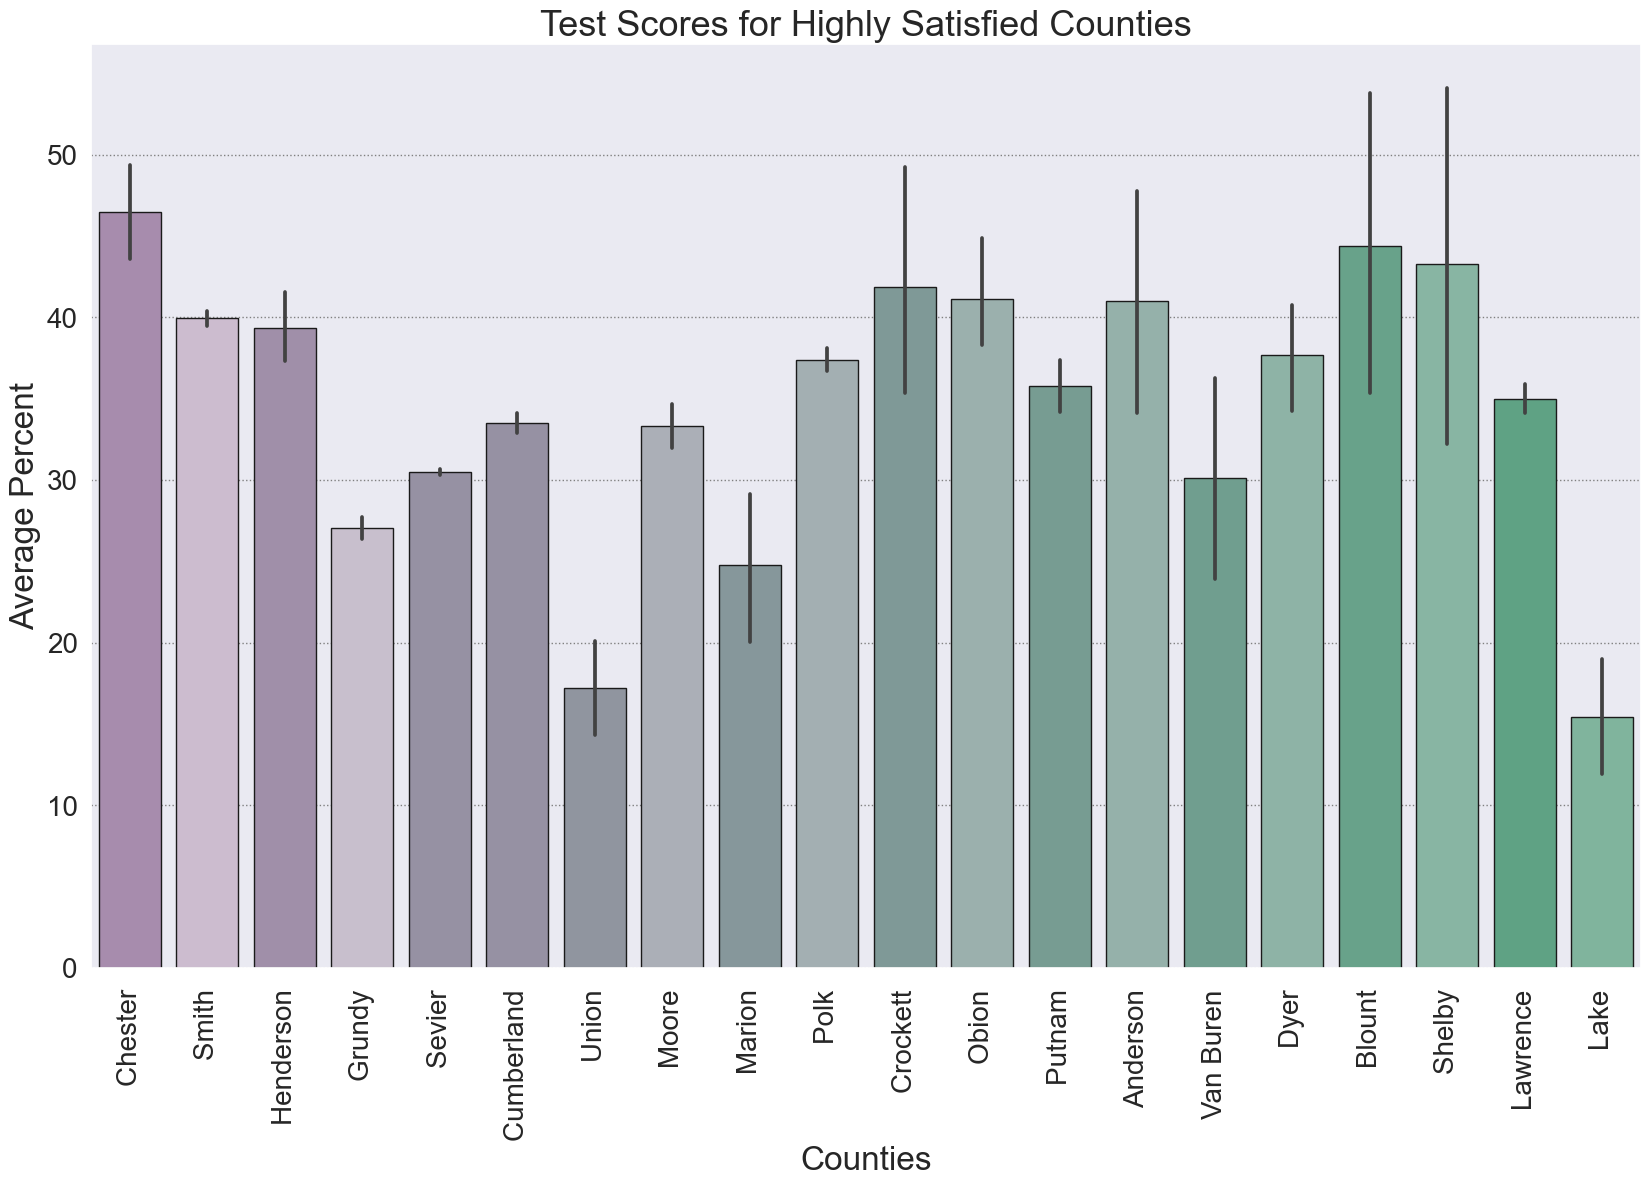

In [53]:
colors = ['#AB86B2', '#CEB9D2', '#A18BAD', '#C9BCD0', '#958EA6', '#958EA6', '#8D94A2', '#A9AEB9', '#83999E', '#A0B1B4',
          '#7B9D9A', '#98B3B0', '#71A295', '#90B6AC', '#68A691', '#88B9A8', '#5FAB8B', '#81BCA4', '#54AD85', '#77BD9E']

customPalette = sns.set_palette(sns.color_palette(colors))

plt.figure(figsize = (20, 12))                              
sns.set_style("darkgrid", {"grid.color":".5", "grid.linestyle": ":"})                                  
sns.barplot(x = 'county', 
            y = 'pct_met_exceeded', 
            data = top_sat_scores, 
            palette = customPalette,
            edgecolor = '.1')
plt.xlabel('Counties', fontsize=24)                                              
plt.ylabel('Average Percent', fontsize=24) 

plt.title('Test Scores for Highly Satisfied Counties', fontsize=26)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('../data/high_sat_counties_scores.png', bbox_inches="tight");

In [54]:
top_satisfied_with_scores = pd.merge(top_avg_str_agree, top_sat_scores, on = 'county', how = 'inner').reset_index()
top_satisfied_with_scores = top_satisfied_with_scores[['county', 'per_strongly_agree', 'pct_met_exceeded']]
top_satisfied_with_scores

,county,per_strongly_agree,pct_met_exceeded
0,Chester,46.875000,43.6
1,Chester,46.875000,49.4
2,Smith,45.468750,40.4
3,Smith,45.468750,39.5
4,Henderson,43.015625,36.9
...,...,...,...
69,Shelby,34.078125,6.1
70,Lawrence,33.468750,35.9
71,Lawrence,33.468750,34.1
72,Lake,33.250000,19.0


In [55]:
top_satisfied_with_scores = top_satisfied_with_scores.groupby('county').mean()
top_satisfied_with_scores = top_satisfied_with_scores.reset_index()

In [56]:
top_satisfied_with_scores = top_satisfied_with_scores.sort_values('per_strongly_agree', ascending = False)

In [57]:
top_satisfied_with_scores.dtypes

county                 object
per_strongly_agree    float64
pct_met_exceeded      float64
dtype: object

In [58]:
top_satisfied_with_scores.to_csv('../data/top_satisfied_with_scores.csv')

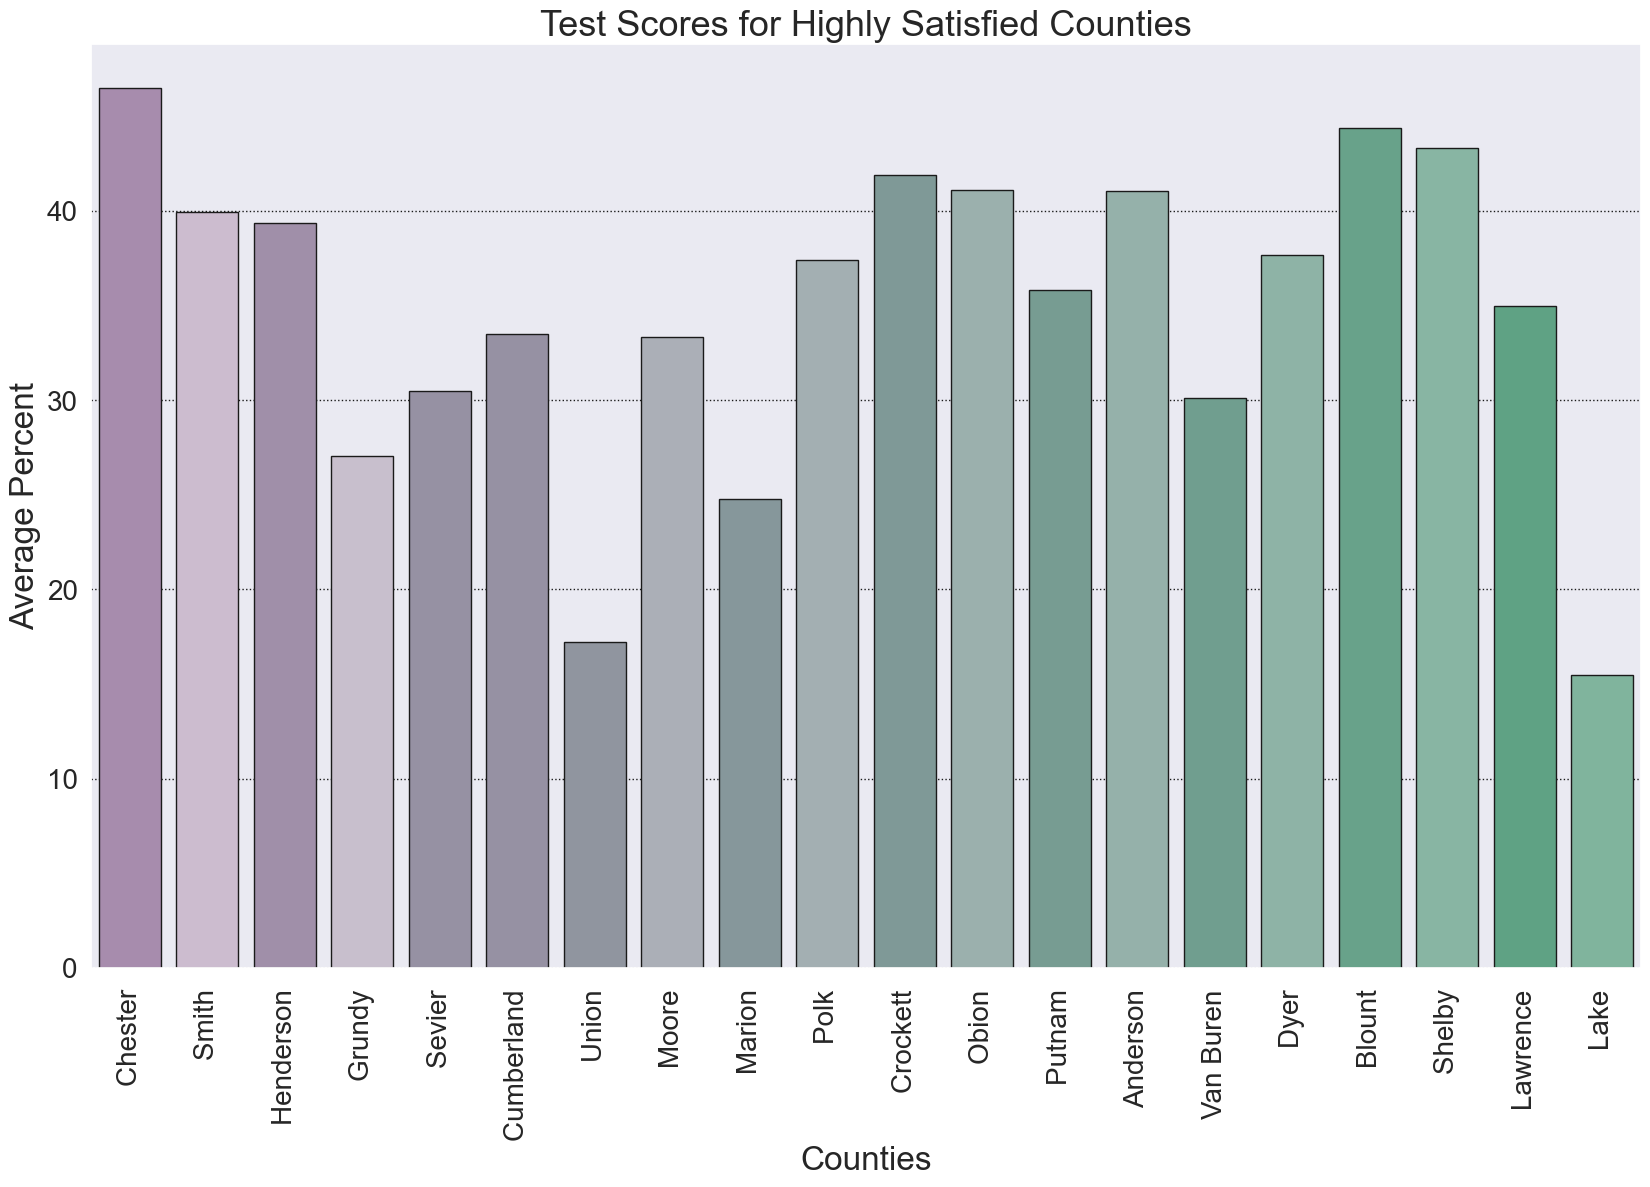

In [59]:
colors = ['#AB86B2', '#CEB9D2', '#A18BAD', '#C9BCD0', '#958EA6', '#958EA6', '#8D94A2', '#A9AEB9', '#83999E', '#A0B1B4',
          '#7B9D9A', '#98B3B0', '#71A295', '#90B6AC', '#68A691', '#88B9A8', '#5FAB8B', '#81BCA4', '#54AD85', '#77BD9E']

customPalette = sns.set_palette(sns.color_palette(colors))

plt.figure(figsize = (20, 12))                              
sns.set_style("darkgrid", {"grid.color":".1", "grid.linestyle": ":"})                                  
sns.barplot(x = 'county', 
            y = 'pct_met_exceeded', 
            data = top_satisfied_with_scores, 
            palette = customPalette,
            edgecolor = '.1')
plt.xlabel('Counties', fontsize=24)                                              
plt.ylabel('Average Percent', fontsize=24) 

plt.title('Test Scores for Highly Satisfied Counties', fontsize=26)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('../data/high_sat_counties_scores.png', bbox_inches="tight");

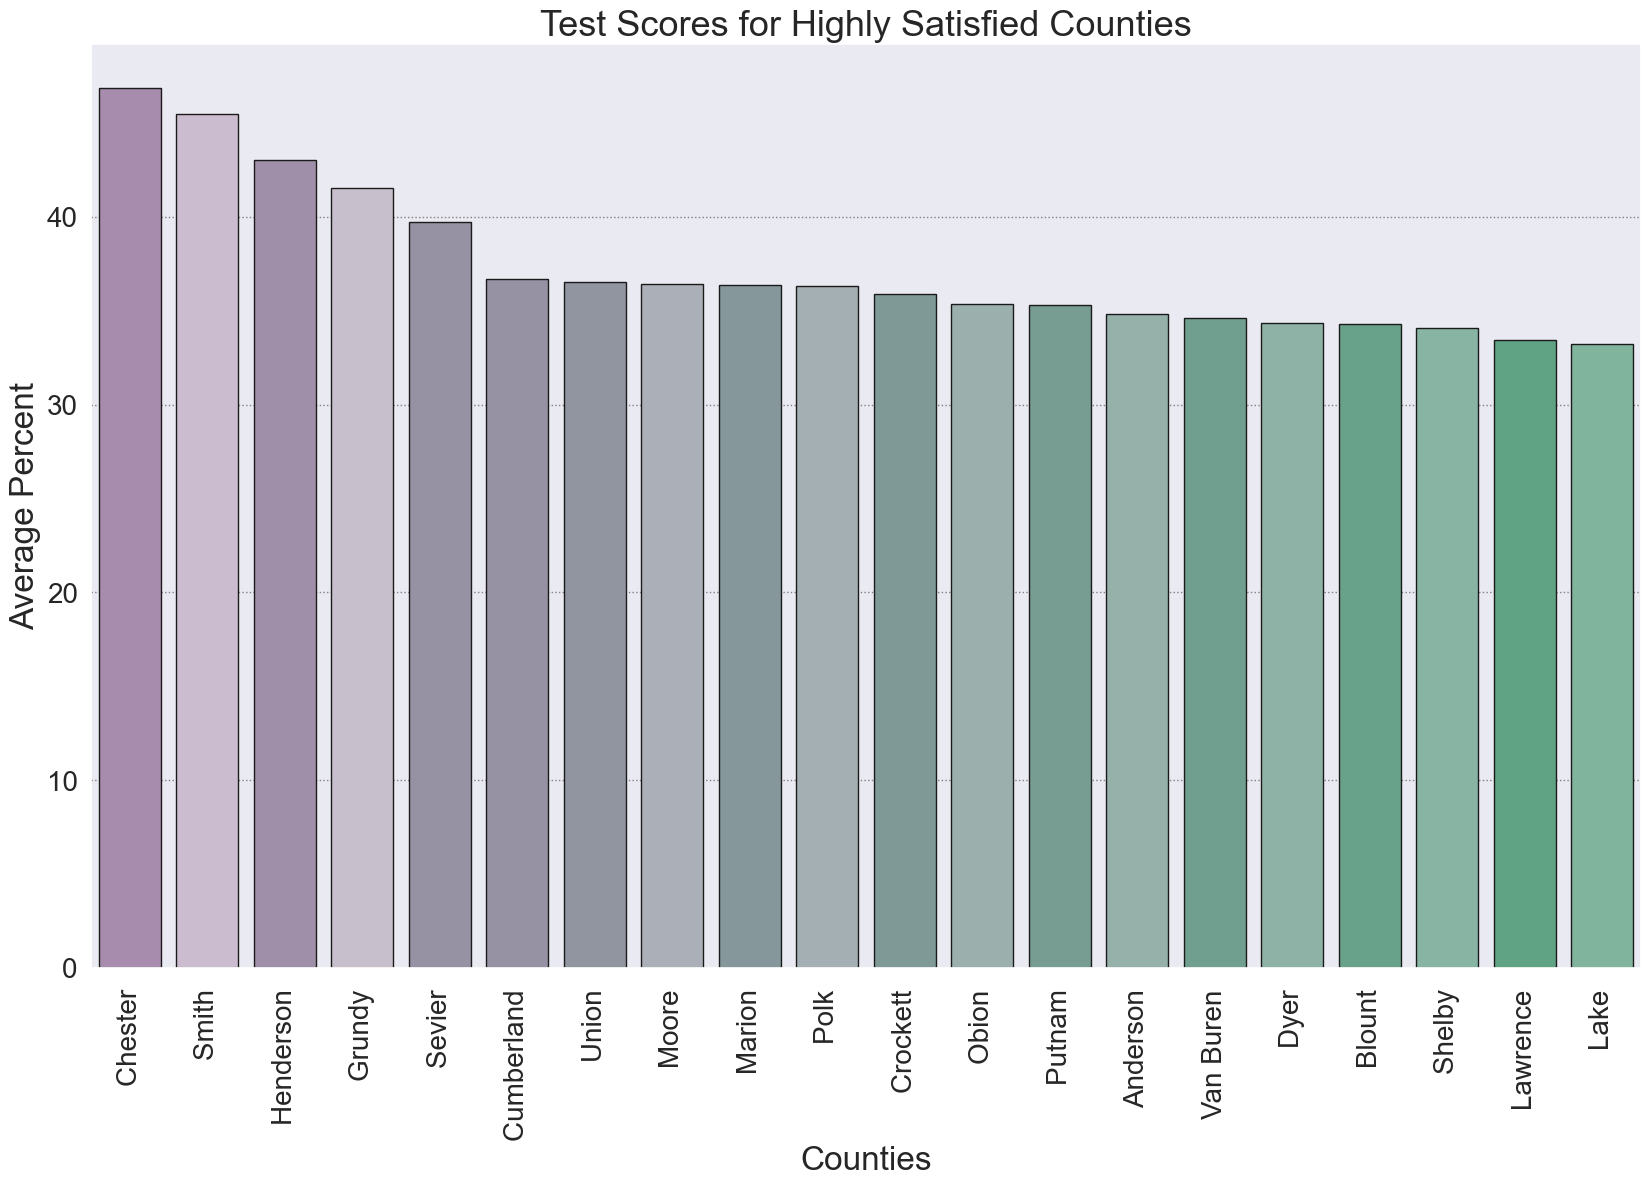

In [60]:
colors = ['#AB86B2', '#CEB9D2', '#A18BAD', '#C9BCD0', '#958EA6', '#958EA6', '#8D94A2', '#A9AEB9', '#83999E', '#A0B1B4',
          '#7B9D9A', '#98B3B0', '#71A295', '#90B6AC', '#68A691', '#88B9A8', '#5FAB8B', '#81BCA4', '#54AD85', '#77BD9E']

customPalette = sns.set_palette(sns.color_palette(colors))

plt.figure(figsize = (20, 12))                              
sns.set_style("darkgrid", {"grid.color":".5", "grid.linestyle": ":"})                                  
sns.barplot(x = 'county', 
            y = 'per_strongly_agree', 
            data = top_satisfied_with_scores, 
            palette = customPalette,
            edgecolor = '.1')
plt.xlabel('Counties', fontsize=24)                                              
plt.ylabel('Average Percent', fontsize=24) 

plt.title('Test Scores for Highly Satisfied Counties', fontsize=26)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)


plt.savefig('../data/high_sat_counties.png', bbox_inches="tight");

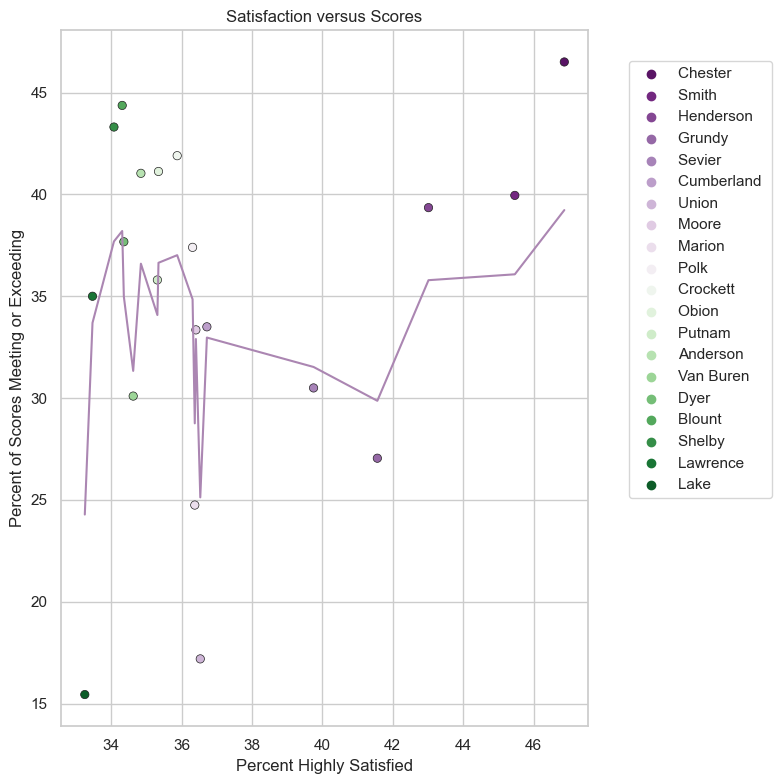

In [61]:
colors = ['#AB86B2', '#CEB9D2', '#A18BAD', '#C9BCD0', '#958EA6', '#958EA6', '#8D94A2', '#A9AEB9', '#83999E', '#A0B1B4',
          '#7B9D9A', '#98B3B0', '#71A295', '#90B6AC', '#68A691', '#88B9A8', '#5FAB8B', '#81BCA4', '#54AD85', '#77BD9E']

customPalette = sns.set_palette(sns.color_palette(colors))

plt.figure(figsize = (8,8))                              
sns.set(style="whitegrid")                                  
sns.scatterplot(x = 'per_strongly_agree', 
            y = 'pct_met_exceeded', 
            data = top_satisfied_with_scores, 
            palette = 'PRGn',
                hue = 'county',
                edgecolor = '.1')
plt.xlabel('Percent Highly Satisfied')                                              
plt.ylabel('Percent of Scores Meeting or Exceeding')                                              
plt.title('Satisfaction versus Scores')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2)

z = np.polyfit(top_satisfied_with_scores['per_strongly_agree'], top_satisfied_with_scores['pct_met_exceeded'], 1)
p = np.poly1d(z)
plt.plot(top_satisfied_with_scores['per_strongly_agree'],p(top_satisfied_with_scores['pct_met_exceeded']),"#AB86B2")

plt.tight_layout()

plt.savefig('../data/high_sat_counties_and_scores.png');

In [62]:
top_sat_scores.to_csv('../data/top_sat_scores.csv')

In [63]:
top_dis_scores = pd.merge(top_str_dis, dist_scores_percent, on = 'district', how = 'left').dropna()
top_dis_scores

,district,per_strongly_dis,system,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded,county
0,Humboldt City Schools,16.709677,271.0,ELA,52.1,35.7,10.9,1.3,12.3,Gibson
1,Humboldt City Schools,16.709677,271.0,Math,61,29.8,7.9,1.3,9.2,Gibson
2,Etowah,13.173913,542.0,ELA,20.7,45.2,26.9,7.2,34.1,McMinn
3,Etowah,13.173913,542.0,Math,24.5,40.4,29.3,5.8,35.1,McMinn
5,Bradford,9.684211,274.0,ELA,14.6,40.1,36.8,8.5,45.2,Gibson
6,Bradford,9.684211,274.0,Math,22.1,39.7,27.2,11,38.2,Gibson
7,Lenoir City,9.583333,531.0,ELA,28.2,45.5,22.2,4.1,26.3,Loudon
8,Lenoir City,9.583333,531.0,Math,30.2,37.2,25.3,7.3,32.5,Loudon
11,Sullivan County,8.444444,820.0,ELA,25.5,43.6,25,5.9,30.9,Sullivan
12,Sullivan County,8.444444,820.0,Math,34.5,37.9,21.8,5.8,27.7,Sullivan


In [64]:
retention_data = pd.read_csv('../data/teacher_retention_2022.csv')

In [65]:
retention_data = retention_data.loc[(retention_data['School Name'] == 'All Schools')]
retention_data.reset_index()

,index,System Number,System Name,School Number,School Name,Percent Retained
0,0,0,State of Tennessee,0,All Schools,92.1
1,1,10,Anderson County,0,All Schools,85.6
2,19,11,Clinton,0,All Schools,96.7
3,23,12,Oak Ridge,0,All Schools,91.4
4,32,20,Bedford County,0,All Schools,88.9
...,...,...,...,...,...,...
144,1911,964,Tennessee Schools for the Deaf,0,All Schools,78.9
145,1915,970,Department Of Children's Services Education Di...,0,All Schools,80.7
146,1918,971,Department of Correction,0,All Schools,83.8
147,1932,985,Achievement School District,0,All Schools,71.4


In [66]:
retention_data.to_csv('../data/retention_data.csv')

In [67]:
top_20_counties = ['Chester', 'Smith', 'Henderson', 'Grundy', 'Sevier', 'Cumberland', 'Union', 'Moore', 'Manon', 'Polk', 'Crockett', 'Obion', 'Putnam', 'Anderson', 'Van Buren', 'Dyer', 'Blount', 'Shelby', 'Lawrence', 'Lake']

In [68]:
district_numbers

,County Number,County Name,District Number
0,1,Anderson County,10
1,1,Anderson County,11
2,1,Anderson County,12
3,3,Bedford County,20
4,5,Benton County,30
...,...,...,...
137,187,Williamson County,940
138,187,Williamson County,941
139,189,Wilson County,950
140,189,Wilson County,951


In [69]:
dist_scores_percent.to_csv('../data/dist_scores_percent.csv')

In [70]:
act_data = pd.read_csv('../data/act_2022.csv')
act_data

,District,District Name,Subgroup,Valid Tests,Participation Rate,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score,Number Scoring 21 or Higher,Percent Scoring 21 or Higher,Number Scoring Below 19,Percent Scoring Below 19
0,10,Anderson County,All Students,509,98,17.9,18.2,19.5,19,18.8,173,34,281,55.2
1,10,Anderson County,Black/Hispanic/Native American,29,97,17.6,18,19.4,18.2,18.4,9,31,17,58.6
2,10,Anderson County,Economically Disadvantaged,171,97,16,16.9,18,17.4,17.2,33,19.3,124,72.5
3,10,Anderson County,English Learners,2,*,*,*,*,*,*,*,*,*,*
4,10,Anderson County,Students with Disabilities,59,91,11.6,15,13.9,14.7,14,1,1.7,57,96.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,987,Tennessee Public Charter School Commission,All Students,96,96,12.6,15,14.6,15.2,14.5,2,2.1,88,91.7
597,987,Tennessee Public Charter School Commission,Black/Hispanic/Native American,95,96,12.6,15.1,14.7,15.2,14.5,2,2.1,87,91.6
598,987,Tennessee Public Charter School Commission,Economically Disadvantaged,62,97,12.4,15.2,14.6,15.6,14.6,1,1.6,57,91.9
599,987,Tennessee Public Charter School Commission,English Learners,6,*,*,*,*,*,*,*,*,*,*


In [71]:
all_act = act_data[['District', 'District Name','Subgroup', 'Average Composite Score']]
all_act.dropna()

,District,District Name,Subgroup,Average Composite Score
0,10,Anderson County,All Students,18.8
1,10,Anderson County,Black/Hispanic/Native American,18.4
2,10,Anderson County,Economically Disadvantaged,17.2
3,10,Anderson County,English Learners,*
4,10,Anderson County,Students with Disabilities,14
...,...,...,...,...
596,987,Tennessee Public Charter School Commission,All Students,14.5
597,987,Tennessee Public Charter School Commission,Black/Hispanic/Native American,14.5
598,987,Tennessee Public Charter School Commission,Economically Disadvantaged,14.6
599,987,Tennessee Public Charter School Commission,English Learners,*


In [72]:
all_act = all_act.loc[(all_act['Subgroup'] == 'All Students')].dropna()
all_act

,District,District Name,Subgroup,Average Composite Score
0,10,Anderson County,All Students,18.8
5,12,Oak Ridge,All Students,21.7
10,20,Bedford County,All Students,18.1
15,30,Benton County,All Students,19.5
19,40,Bledsoe County,All Students,17.1
...,...,...,...,...
579,963,Tennessee School for Blind,All Students,*
581,964,Tennessee Schools for the Deaf,All Students,*
586,970,Department Of Children's Services Education Di...,All Students,15
591,985,Achievement School District,All Students,13.6


In [73]:
district_numbers

,County Number,County Name,District Number
0,1,Anderson County,10
1,1,Anderson County,11
2,1,Anderson County,12
3,3,Bedford County,20
4,5,Benton County,30
...,...,...,...
137,187,Williamson County,940
138,187,Williamson County,941
139,189,Wilson County,950
140,189,Wilson County,951


In [74]:
all_act = pd.merge(all_act, district_numbers, left_on = 'District', right_on = 'District Number', how = 'inner')
all_act

,District,District Name,Subgroup,Average Composite Score,County Number,County Name,District Number
0,10,Anderson County,All Students,18.8,1,Anderson County,10
1,12,Oak Ridge,All Students,21.7,1,Anderson County,12
2,20,Bedford County,All Students,18.1,3,Bedford County,20
3,30,Benton County,All Students,19.5,5,Benton County,30
4,40,Bledsoe County,All Students,17.1,7,Bledsoe County,40
...,...,...,...,...,...,...,...
121,930,White County,All Students,19.1,185,White County,930
122,940,Williamson County,All Students,24.7,187,Williamson County,940
123,950,Wilson County,All Students,20.5,189,Wilson County,950
124,961,Alvin C York Institute,All Students,18.8,49,Fentress County,961


In [75]:
all_act['County Name'] = all_act['County Name'].str.replace('County', '')
all_act

,District,District Name,Subgroup,Average Composite Score,County Number,County Name,District Number
0,10,Anderson County,All Students,18.8,1,Anderson,10
1,12,Oak Ridge,All Students,21.7,1,Anderson,12
2,20,Bedford County,All Students,18.1,3,Bedford,20
3,30,Benton County,All Students,19.5,5,Benton,30
4,40,Bledsoe County,All Students,17.1,7,Bledsoe,40
...,...,...,...,...,...,...,...
121,930,White County,All Students,19.1,185,White,930
122,940,Williamson County,All Students,24.7,187,Williamson,940
123,950,Wilson County,All Students,20.5,189,Wilson,950
124,961,Alvin C York Institute,All Students,18.8,49,Fentress,961


In [76]:
all_act = all_act.rename(columns = {'District Name': 'district',
                                   'Average Composite Score': 'act_avg_comp',
                                   'County Name': 'county'})
all_act

,District,district,Subgroup,act_avg_comp,County Number,county,District Number
0,10,Anderson County,All Students,18.8,1,Anderson,10
1,12,Oak Ridge,All Students,21.7,1,Anderson,12
2,20,Bedford County,All Students,18.1,3,Bedford,20
3,30,Benton County,All Students,19.5,5,Benton,30
4,40,Bledsoe County,All Students,17.1,7,Bledsoe,40
...,...,...,...,...,...,...,...
121,930,White County,All Students,19.1,185,White,930
122,940,Williamson County,All Students,24.7,187,Williamson,940
123,950,Wilson County,All Students,20.5,189,Wilson,950
124,961,Alvin C York Institute,All Students,18.8,49,Fentress,961


In [77]:
all_act = all_act[['county', 'act_avg_comp']]
all_act

,county,act_avg_comp
0,Anderson,18.8
1,Anderson,21.7
2,Bedford,18.1
3,Benton,19.5
4,Bledsoe,17.1
...,...,...
121,White,19.1
122,Williamson,24.7
123,Wilson,20.5
124,Fentress,18.8


In [78]:
all_act['act_avg_comp'] = all_act['act_avg_comp'].astype(float)


C:\Users\oxyje\AppData\Local\Temp\ipykernel_208436\1754576222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_act['act_avg_comp'] = all_act['act_avg_comp'].astype(float)


In [79]:
all_act.dtypes

county           object
act_avg_comp    float64
dtype: object

In [80]:
all_act = all_act.groupby('county').mean()

In [81]:
top_satisfied_with_scores = pd.merge(top_satisfied_with_scores, all_act, on = 'county', how = 'left').round(2)

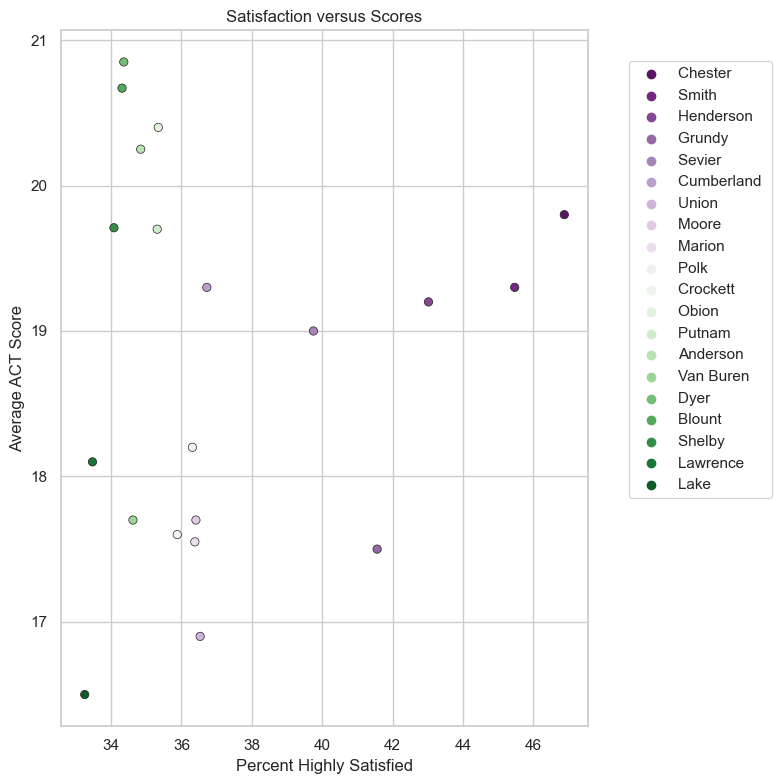

In [82]:
plt.figure(figsize = (8,8))                              
sns.set(style="whitegrid")                                  
sns.scatterplot(x = 'per_strongly_agree', 
            y = 'act_avg_comp', 
            data = top_satisfied_with_scores, 
            palette = 'PRGn',
            edgecolor = '.1',
               hue = 'county')
plt.xlabel('Percent Highly Satisfied')                                              
plt.ylabel('Average ACT Score')                                              
plt.title('Satisfaction versus Scores')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2)
plt.tight_layout()
plt.savefig('../data/high_sat_counties_and_act_scores.png');

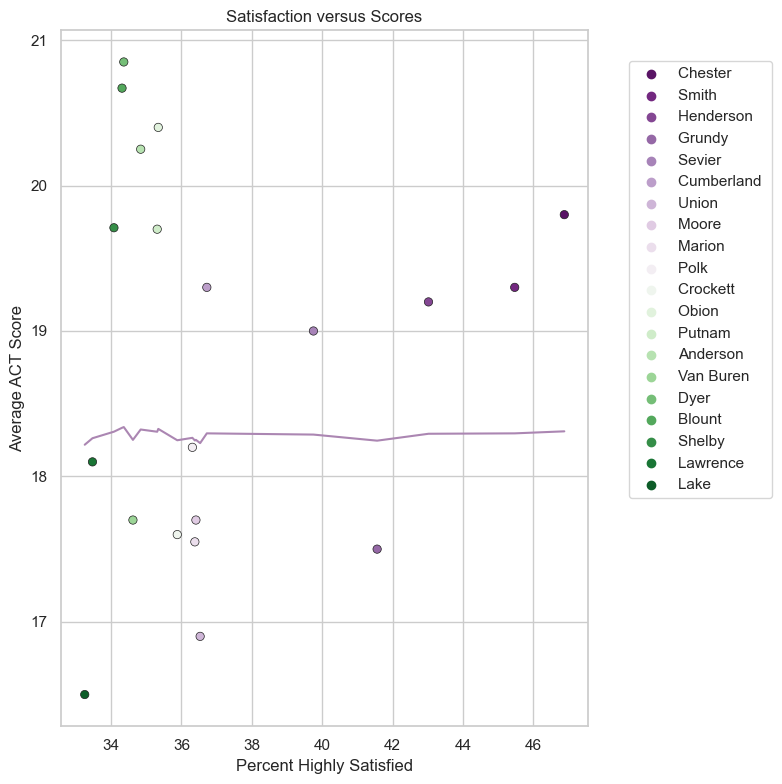

In [83]:


plt.figure(figsize = (8,8))                              
sns.set(style="whitegrid")                                  
sns.scatterplot(x = 'per_strongly_agree', 
            y = 'act_avg_comp', 
            data = top_satisfied_with_scores, 
            palette = 'PRGn',
            edgecolor = '.1',
               hue = 'county')
plt.xlabel('Percent Highly Satisfied')                                              
plt.ylabel('Average ACT Score')                                              
plt.title('Satisfaction versus Scores')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2)



z = np.polyfit(top_satisfied_with_scores['per_strongly_agree'], top_satisfied_with_scores['act_avg_comp'], 1)
p = np.poly1d(z)
plt.plot(top_satisfied_with_scores['per_strongly_agree'],p(top_satisfied_with_scores['act_avg_comp']),"#AB86B2")
plt.tight_layout()
plt.savefig('../data/high_sat_counties_and_act_scores2.png')

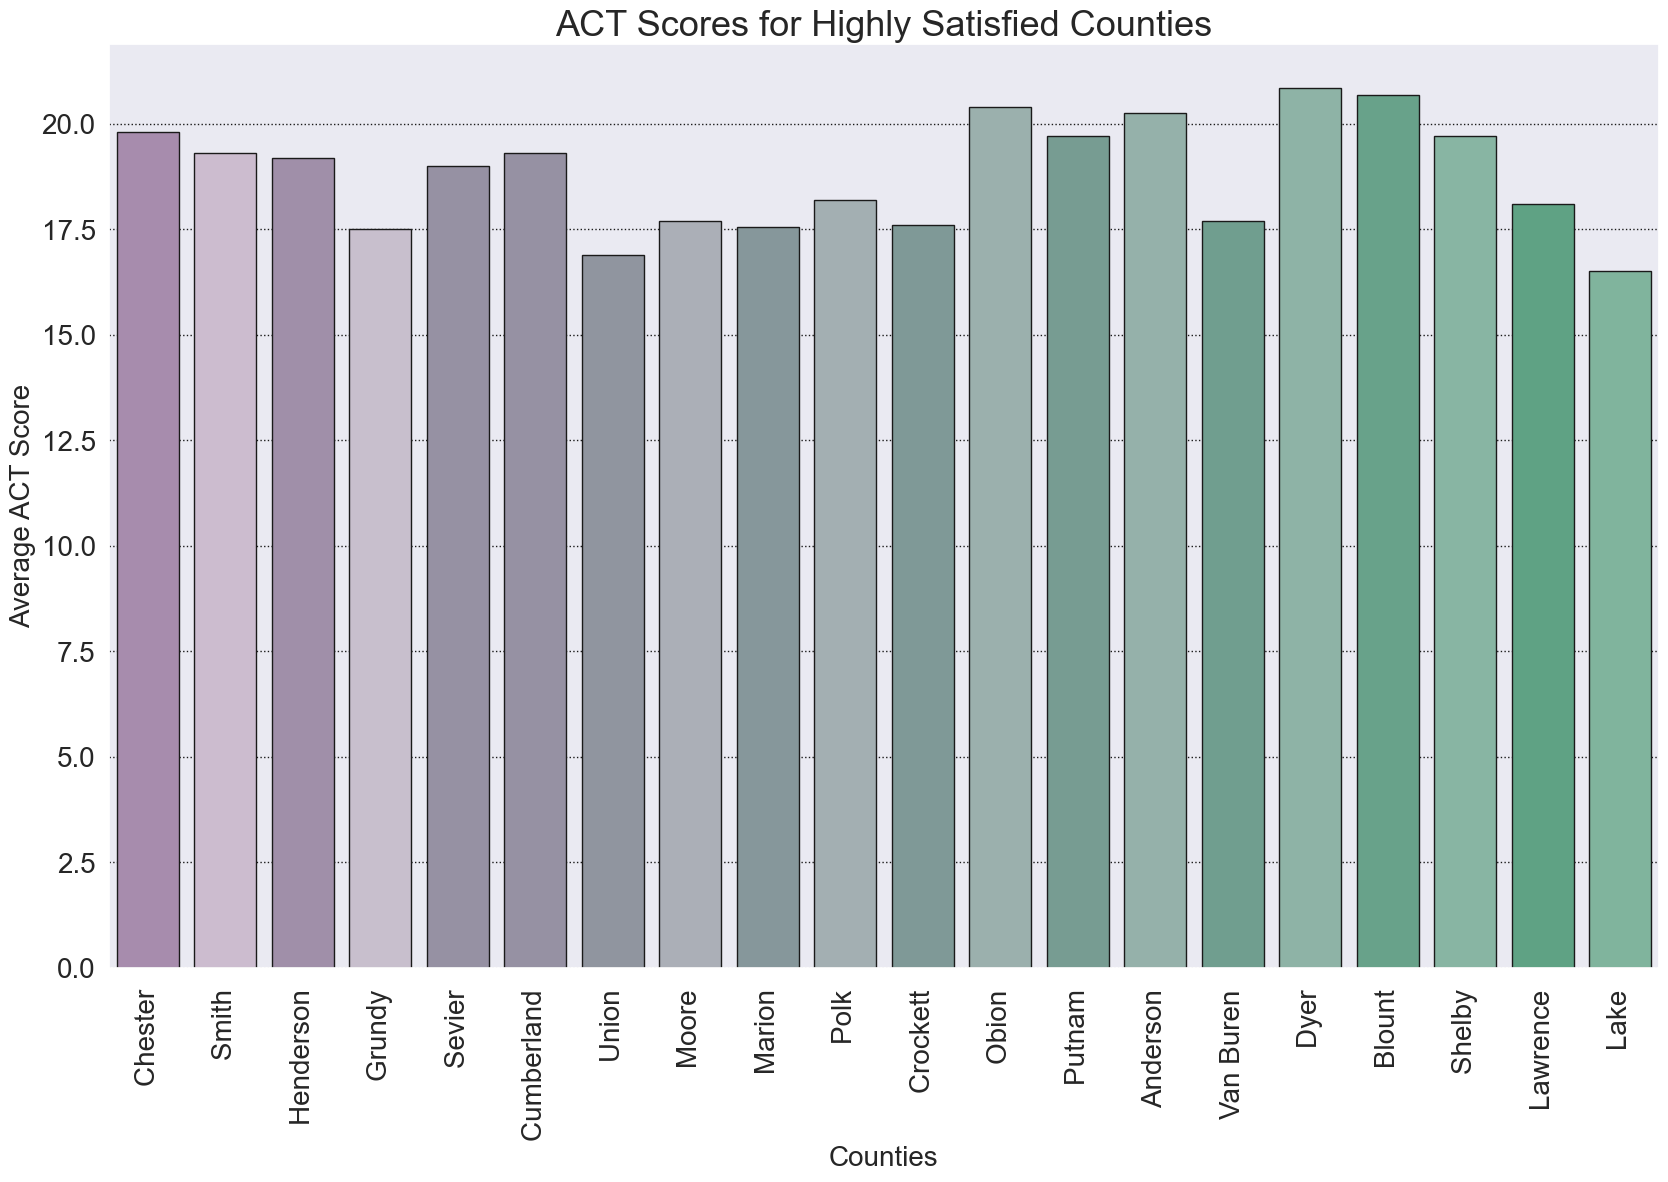

In [84]:
colors = ['#AB86B2', '#CEB9D2', '#A18BAD', '#C9BCD0', '#958EA6', '#958EA6', '#8D94A2', '#A9AEB9', '#83999E', '#A0B1B4',
          '#7B9D9A', '#98B3B0', '#71A295', '#90B6AC', '#68A691', '#88B9A8', '#5FAB8B', '#81BCA4', '#54AD85', '#77BD9E']

customPalette = sns.set_palette(sns.color_palette(colors))

plt.figure(figsize = (20, 12))                              
sns.set_style("darkgrid", {"grid.color":".1", "grid.linestyle": ":"})                                  
sns.barplot(x = 'county', 
            y = 'act_avg_comp', 
            data = top_satisfied_with_scores, 
            palette = customPalette,
            edgecolor = '.1')
plt.xlabel('Counties', fontsize=20)                                              
plt.ylabel('Average ACT Score', fontsize=20) 

plt.title('ACT Scores for Highly Satisfied Counties', fontsize=26)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('../data/high_sat_counties_act_scores.png', bbox_inches="tight");

In [85]:
scores

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,2022,10,Anderson County,EOC,Algebra I,10,All Students,99,79,78,77,**,**,**,**,**,**,**,**,1.3
1,2022,10,Anderson County,EOC,Algebra I,10,American Indian or Alaska Native,*,1,1,1,*,*,*,*,*,*,*,*,*
2,2022,10,Anderson County,EOC,Algebra I,10,Black or African American,*,2,2,2,*,*,*,*,*,*,*,*,*
3,2022,10,Anderson County,EOC,Algebra I,10,Black/Hispanic/Native American,*,10,10,9,*,*,*,*,*,*,*,*,*
4,2022,10,Anderson County,EOC,Algebra I,10,Economically Disadvantaged,97,34,33,33,**,**,**,**,**,**,**,**,**
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167626,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-English Learners/Transitional 1-4,99,77,76,76,**,**,**,**,**,**,**,**,6.6
167627,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-Students with Disabilities,99,82,81,78,**,**,**,**,**,**,**,**,7.7
167628,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Students with Disabilities,*,7,7,7,*,*,*,*,*,*,*,*,*
167629,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Super Subgroup,99,85,84,81,**,**,**,**,**,**,**,**,6.2


In [86]:
scores_all_grades = scores.loc[(scores.grade == 'All Grades')&(scores.test == 'TNReady')].reset_index()
scores_all_grades

,index,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,...,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,491,2022,10,Anderson County,TNReady,ELA,All Grades,All Students,98,2731,...,2667,725,1148,639,155,27.2,43,24,5.8,29.8
1,492,2022,10,Anderson County,TNReady,ELA,All Grades,American Indian or Alaska Native,100,11,...,10,**,**,**,**,**,**,**,**,**
2,494,2022,10,Anderson County,TNReady,ELA,All Grades,Asian,100,16,...,16,4,6,5,1,24.9,37.5,31.3,6.3,37.5
3,496,2022,10,Anderson County,TNReady,ELA,All Grades,Black or African American,99,104,...,103,36,43,23,1,35,41.7,22.3,1,23.3
4,498,2022,10,Anderson County,TNReady,ELA,All Grades,Black/Hispanic/Native American,96,222,...,208,73,84,48,3,35.1,40.4,23.1,1.4,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,167559,2022,987,Tennessee Public Charter School Commission,TNReady,Social Studies,All Grades,Non-English Learners/Transitional 1-4,99,157,...,156,25,79,50,2,16,50.6,32.1,1.3,33.3
11744,167560,2022,987,Tennessee Public Charter School Commission,TNReady,Social Studies,All Grades,Non-Students with Disabilities,100,230,...,227,**,**,**,**,**,**,**,**,33
11745,167562,2022,987,Tennessee Public Charter School Commission,TNReady,Social Studies,All Grades,Students with Disabilities,100,29,...,29,**,**,**,**,**,**,**,**,3.4
11746,167564,2022,987,Tennessee Public Charter School Commission,TNReady,Social Studies,All Grades,Super Subgroup,100,243,...,240,**,**,**,**,**,**,**,**,28.8


In [87]:
scores_all_grades = scores_all_grades.loc[(scores_all_grades.subject == 'ELA')|(scores_all_grades.subject == 'Math')]
scores_all_grades

,index,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,...,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,491,2022,10,Anderson County,TNReady,ELA,All Grades,All Students,98,2731,...,2667,725,1148,639,155,27.2,43,24,5.8,29.8
1,492,2022,10,Anderson County,TNReady,ELA,All Grades,American Indian or Alaska Native,100,11,...,10,**,**,**,**,**,**,**,**,**
2,494,2022,10,Anderson County,TNReady,ELA,All Grades,Asian,100,16,...,16,4,6,5,1,24.9,37.5,31.3,6.3,37.5
3,496,2022,10,Anderson County,TNReady,ELA,All Grades,Black or African American,99,104,...,103,36,43,23,1,35,41.7,22.3,1,23.3
4,498,2022,10,Anderson County,TNReady,ELA,All Grades,Black/Hispanic/Native American,96,222,...,208,73,84,48,3,35.1,40.4,23.1,1.4,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11700,167325,2022,987,Tennessee Public Charter School Commission,TNReady,Math,All Grades,Non-English Learners/Transitional 1-4,99,416,...,413,113,159,106,35,27.3,38.5,25.7,8.5,34.1
11701,167326,2022,987,Tennessee Public Charter School Commission,TNReady,Math,All Grades,Non-Students with Disabilities,99,577,...,564,153,212,155,44,27.1,37.6,27.5,7.8,35.3
11702,167328,2022,987,Tennessee Public Charter School Commission,TNReady,Math,All Grades,Students with Disabilities,100,57,...,57,35,16,5,1,61.3,28.1,8.8,1.8,10.5
11703,167330,2022,987,Tennessee Public Charter School Commission,TNReady,Math,All Grades,Super Subgroup,99,572,...,559,176,212,141,30,31.5,37.9,25.2,5.4,30.6


In [88]:
scores_all_grades = scores_all_grades[['system', 'system_name', 'subject', 'student_group', 'pct_met_exceeded']]
scores_all_grades

,system,system_name,subject,student_group,pct_met_exceeded
0,10,Anderson County,ELA,All Students,29.8
1,10,Anderson County,ELA,American Indian or Alaska Native,**
2,10,Anderson County,ELA,Asian,37.5
3,10,Anderson County,ELA,Black or African American,23.3
4,10,Anderson County,ELA,Black/Hispanic/Native American,24.5
...,...,...,...,...,...
11700,987,Tennessee Public Charter School Commission,Math,Non-English Learners/Transitional 1-4,34.1
11701,987,Tennessee Public Charter School Commission,Math,Non-Students with Disabilities,35.3
11702,987,Tennessee Public Charter School Commission,Math,Students with Disabilities,10.5
11703,987,Tennessee Public Charter School Commission,Math,Super Subgroup,30.6


In [89]:
scores_all_grades = pd.merge(scores_all_grades, district_numbers, left_on = 'system', right_on = 'District Number', how = 'inner')

In [90]:
scores_all_grades

,system,system_name,subject,student_group,pct_met_exceeded,County Number,County Name,District Number
0,10,Anderson County,ELA,All Students,29.8,1,Anderson County,10
1,10,Anderson County,ELA,American Indian or Alaska Native,**,1,Anderson County,10
2,10,Anderson County,ELA,Asian,37.5,1,Anderson County,10
3,10,Anderson County,ELA,Black or African American,23.3,1,Anderson County,10
4,10,Anderson County,ELA,Black/Hispanic/Native American,24.5,1,Anderson County,10
...,...,...,...,...,...,...,...,...
5772,985,Achievement School District,Math,Non-English Learners/Transitional 1-4,6.2,157,Shelby County,985
5773,985,Achievement School District,Math,Non-Students with Disabilities,6.6,157,Shelby County,985
5774,985,Achievement School District,Math,Students with Disabilities,2.1,157,Shelby County,985
5775,985,Achievement School District,Math,Super Subgroup,5.9,157,Shelby County,985


In [91]:
scores_all_grades['county'] = scores_all_grades['County Name'].str.replace('County', '')
scores_all_grades

,system,system_name,subject,student_group,pct_met_exceeded,County Number,County Name,District Number,county
0,10,Anderson County,ELA,All Students,29.8,1,Anderson County,10,Anderson
1,10,Anderson County,ELA,American Indian or Alaska Native,**,1,Anderson County,10,Anderson
2,10,Anderson County,ELA,Asian,37.5,1,Anderson County,10,Anderson
3,10,Anderson County,ELA,Black or African American,23.3,1,Anderson County,10,Anderson
4,10,Anderson County,ELA,Black/Hispanic/Native American,24.5,1,Anderson County,10,Anderson
...,...,...,...,...,...,...,...,...,...
5772,985,Achievement School District,Math,Non-English Learners/Transitional 1-4,6.2,157,Shelby County,985,Shelby
5773,985,Achievement School District,Math,Non-Students with Disabilities,6.6,157,Shelby County,985,Shelby
5774,985,Achievement School District,Math,Students with Disabilities,2.1,157,Shelby County,985,Shelby
5775,985,Achievement School District,Math,Super Subgroup,5.9,157,Shelby County,985,Shelby


In [92]:
scores_all_grades.to_csv('../data/scores_all_grades.csv')

In [93]:
scores_all_grades = scores_all_grades[['county', 'subject', 'student_group','pct_met_exceeded']]
scores_all_grades

,county,subject,student_group,pct_met_exceeded
0,Anderson,ELA,All Students,29.8
1,Anderson,ELA,American Indian or Alaska Native,**
2,Anderson,ELA,Asian,37.5
3,Anderson,ELA,Black or African American,23.3
4,Anderson,ELA,Black/Hispanic/Native American,24.5
...,...,...,...,...
5772,Shelby,Math,Non-English Learners/Transitional 1-4,6.2
5773,Shelby,Math,Non-Students with Disabilities,6.6
5774,Shelby,Math,Students with Disabilities,2.1
5775,Shelby,Math,Super Subgroup,5.9


In [94]:
exp_data = pd.read_csv('../data/per-pupil-expenditures-fy22.csv')

In [95]:
exp_data

,Key,Dist,District ID,District Name,School ID,School Name,Enrollment,Federal Per Pupil,State and Local Per Pupil,Total Per Pupil,...,State Percentage,Unnamed: 23,Total Federal Salaries & Benefits,Federal Salaries & Benefits Per Pupil,Total Federal Non-personnel,Federal Non-personnel Per Pupil,Total State/Local Salaries & Benefits,State/Local Salaries & benefits Per Pupil,Total State/Local Non-personnel,State/Local Non-personnel Per Pupil
0,010 9999,10.0,10.0,Anderson County,9999.0,District Average/Total,"6,091","$1,831.52","$9,784.89","$11,616.41",...,36.56728%,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,011 9999,11.0,11.0,Clinton City,9999.0,District Average/Total,928,"$2,584.70","$9,674.37","$12,259.07",...,38.50333%,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,012 9999,12.0,12.0,Oak Ridge,9999.0,District Average/Total,"4,531","$2,536.91","$12,393.12","$14,930.03",...,48.67624%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,020 9999,20.0,20.0,Bedford County,9999.0,District Average/Total,"8,641","$1,670.89","$7,795.04","$9,465.93",...,16.61689%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,030 9999,30.0,30.0,Benton County,9999.0,District Average/Total,"2,021","$2,653.52","$9,243.24","$11,896.76",...,24.07752%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,987 8005,987.0,987.0,Tennessee Public Charter School Commission,8005.0,Bluff City High School,500,"$2,407.76","$10,126.37","$12,534.13",...,NaN,NaN,"$1,148,117.00","$2,296.23",$0.00,$0.00,"$2,384,439.00","$4,768.88","$77,446.00",154.892000
1904,987 8015,987.0,987.0,Tennessee Public Charter School Commission,8015.0,KIPP Antioch College Prep Elementary,559,"$2,631.94","$12,629.34","$15,261.28",...,NaN,NaN,"$788,124.00","$1,409.88",$0.00,$0.00,"$3,925,592.00","$7,022.53","$225,955.00",404.212880
1905,987 8020,987.0,987.0,Tennessee Public Charter School Commission,8020.0,KIPP Antioch College Prep Middle,398,"$2,164.17","$12,223.77","$14,387.94",...,NaN,NaN,"$554,906.00","$1,394.24",$0.00,$0.00,"$2,497,793.00","$6,275.86","$296,631.00",745.304020
1906,987 8030,987.0,987.0,Tennessee Public Charter School Commission,8030.0,Nashville Collegiate Prep,318,"$1,577.17","$12,299.10","$13,876.27",...,NaN,NaN,"$305,274.00",$0.32,"$16,455.00",$0.02,"$2,180,654.00",$2.26,"$76,033.00",0.078753


In [96]:
exp_per_student = exp_data[['Dist', 'District Name', 'Total School Per Pupil Expenditures' ]].dropna()
exp_per_student

,Dist,District Name,Total School Per Pupil Expenditures
0,10.0,Anderson County,"$11,616.40"
1,11.0,Clinton City,"$12,259.06"
2,12.0,Oak Ridge,"$14,930.03"
3,20.0,Bedford County,"$9,465.94"
4,30.0,Benton County,"$11,896.75"
...,...,...,...
1902,951.0,Lebanon SSD,"$10,914.75"
1903,987.0,Tennessee Public Charter School Commission,"$11,953.03"
1904,987.0,Tennessee Public Charter School Commission,"$14,680.18"
1905,987.0,Tennessee Public Charter School Commission,"$13,806.83"


In [97]:
exp_per_student['Dist'].astype(int)

0        10
1        11
2        12
3        20
4        30
       ... 
1902    951
1903    987
1904    987
1905    987
1906    987
Name: Dist, Length: 1904, dtype: int32

In [98]:
district_numbers.dtypes

County Number       int64
County Name        object
District Number     int64
dtype: object

In [99]:
district_numbers['County Name'] = district_numbers['County Name'].str.replace('County', '')
district_numbers

,County Number,County Name,District Number
0,1,Anderson,10
1,1,Anderson,11
2,1,Anderson,12
3,3,Bedford,20
4,5,Benton,30
...,...,...,...
137,187,Williamson,940
138,187,Williamson,941
139,189,Wilson,950
140,189,Wilson,951


In [100]:
exp_per_student = pd.merge(exp_per_student, district_numbers, left_on = 'Dist', right_on = 'District Number', how = 'inner')

In [101]:
exp_per_student = exp_per_student[['County Name', 'Total School Per Pupil Expenditures']]
exp_per_student

,County Name,Total School Per Pupil Expenditures
0,Anderson,"$11,616.40"
1,Anderson,"$10,326.75"
2,Anderson,"$15,483.43"
3,Anderson,"$12,013.49"
4,Anderson,"$15,018.61"
...,...,...
1894,Wilson,"$12,816.91"
1895,Wilson,"$11,944.62"
1896,Wilson,"$11,145.72"
1897,Wilson,"$11,830.86"


In [102]:
exp_per_student = exp_per_student.rename(columns = {
                                                   'County Name': 'county',
                                                   'Total School Per Pupil Expenditures': 'per_pup_exp'})
exp_per_student

,county,per_pup_exp
0,Anderson,"$11,616.40"
1,Anderson,"$10,326.75"
2,Anderson,"$15,483.43"
3,Anderson,"$12,013.49"
4,Anderson,"$15,018.61"
...,...,...
1894,Wilson,"$12,816.91"
1895,Wilson,"$11,944.62"
1896,Wilson,"$11,145.72"
1897,Wilson,"$11,830.86"


In [103]:
exp_per_student.dtypes

county         object
per_pup_exp    object
dtype: object

In [104]:
exp_per_student.per_pup_exp = exp_per_student.per_pup_exp.str.replace('$', '').str.replace(',', '')

C:\Users\oxyje\AppData\Local\Temp\ipykernel_208436\3628397592.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  exp_per_student.per_pup_exp = exp_per_student.per_pup_exp.str.replace('$', '').str.replace(',', '')


In [105]:
exp_per_student.per_pup_exp = exp_per_student.per_pup_exp.astype(float)

In [106]:
exp_per_student = exp_per_student.groupby('county').mean()

In [107]:
exp_per_student.to_csv('../data/exp_per_student.csv')

In [108]:
top_sat_totals = pd.merge(top_satisfied_with_scores, exp_per_student, on = 'county', how = 'left')

In [109]:
dist_scores_me = dist_scores_percent[['county', 'pct_met_exceeded']]
dist_scores_me



,county,pct_met_exceeded
0,Anderson,29.8
1,Anderson,28.2
2,Anderson,49.7
3,Anderson,48.8
4,Anderson,43.5
...,...,...
287,NaN,*
288,Shelby,8.8
289,Shelby,6.1
290,NaN,34.5


In [110]:
dist_scores_me.pct_met_exceeded = dist_scores_me.pct_met_exceeded.str.replace('*', '0').astype(float)

C:\Users\oxyje\AppData\Local\Temp\ipykernel_208436\667519718.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dist_scores_me.pct_met_exceeded = dist_scores_me.pct_met_exceeded.str.replace('*', '0').astype(float)
C:\Users\oxyje\AppData\Local\Temp\ipykernel_208436\667519718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_scores_me.pct_met_exceeded = dist_scores_me.pct_met_exceeded.str.replace('*', '0').astype(float)


In [111]:
dist_scores_me.dtypes

county               object
pct_met_exceeded    float64
dtype: object

In [112]:
dist_scores_me = dist_scores_me.groupby('county').mean()

In [113]:
all_counties = pd.merge(dist_scores_me, all_act, on = 'county', how = 'inner')

In [114]:
all_counties = pd.merge(all_counties, exp_per_student, on = 'county', how = 'inner')

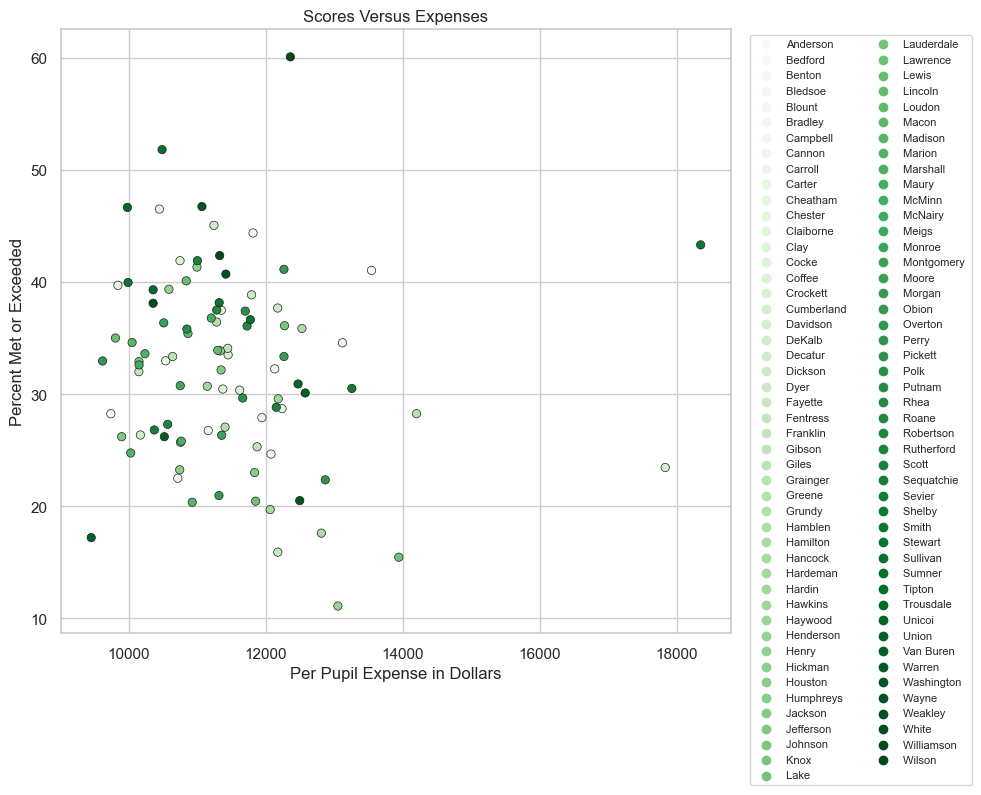

In [115]:
plt.figure(figsize = (10, 8))                              
sns.set(style="whitegrid")                                  
sns.scatterplot(x = 'per_pup_exp', 
            y = 'pct_met_exceeded', 
            data = all_counties,
            palette = 'Greens',
            edgecolor = '.1',
            hue = 'county')
plt.ylabel('Percent Met or Exceeded')                                              
plt.xlabel('Per Pupil Expense in Dollars')                                              
plt.title('Scores Versus Expenses')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2, fontsize=8)



plt.tight_layout()
plt.savefig('../data/counties_scatter.png', bbox_inches="tight");

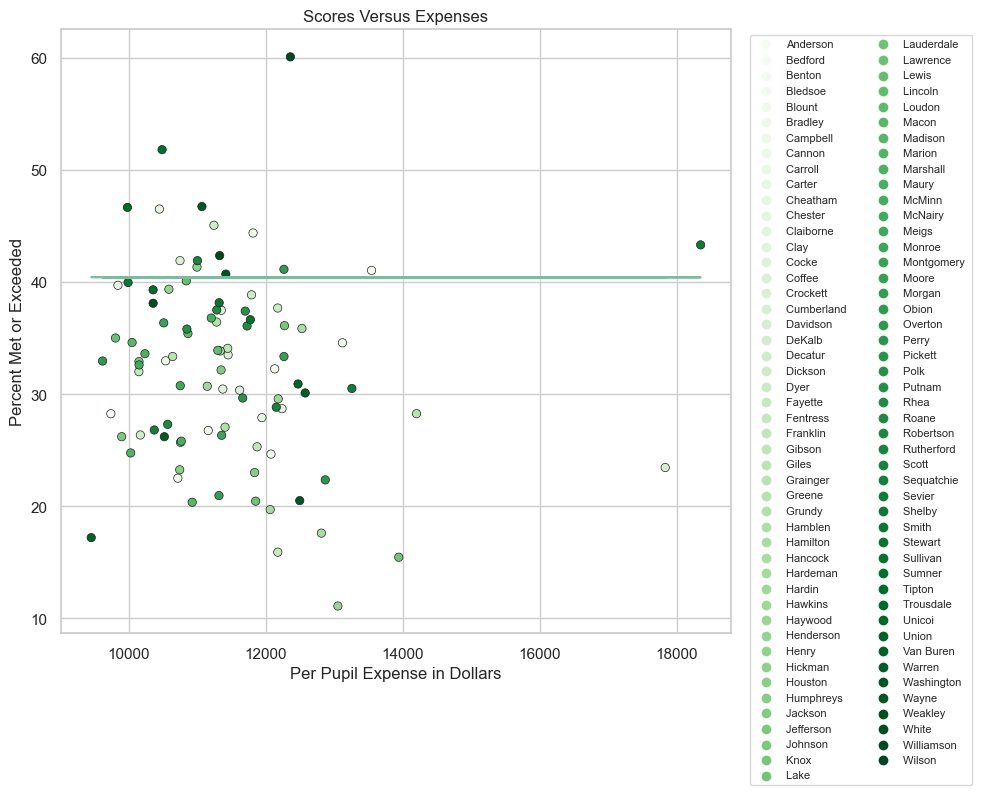

In [116]:
plt.figure(figsize = (10, 8))                              
sns.set(style="whitegrid")                                  
sns.scatterplot(x = 'per_pup_exp', 
            y = 'pct_met_exceeded', 
            data = all_counties,
            palette = 'Greens',
            edgecolor = '.1',
            hue = 'county')
plt.ylabel('Percent Met or Exceeded')                                              
plt.xlabel('Per Pupil Expense in Dollars')                                              
plt.title('Scores Versus Expenses')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2, fontsize=8)


z = np.polyfit(all_counties['per_pup_exp'], all_counties['pct_met_exceeded'], 1)
p = np.poly1d(z)
plt.plot(all_counties['per_pup_exp'],p(all_counties['pct_met_exceeded']),"#77BD9E")

plt.tight_layout()
plt.savefig('../data/counties_scatter.png', bbox_inches="tight");

In [117]:
all_counties.to_csv('../data/all_counties.csv')

In [118]:
all_counties

,pct_met_exceeded,act_avg_comp,per_pup_exp
county,,,
Anderson,41.033333,20.250000,13543.090690
Bedford,28.250000,18.100000,9734.313125
Benton,32.250000,19.500000,12128.170000
Bledsoe,24.650000,17.100000,12073.971667
Blount,44.366667,20.666667,11811.887714
...,...,...,...
Wayne,20.500000,18.000000,12493.906250
Weakley,40.700000,19.400000,11414.550000
White,38.100000,19.100000,10352.466667


In [119]:
all_counties.sort_values('pct_met_exceeded', ascending = False)

,pct_met_exceeded,act_avg_comp,per_pup_exp
county,,,
Williamson,60.075,24.70,12357.084754
Sumner,51.800,20.20,10482.971458
Washington,46.725,20.45,11065.101034
Trousdale,46.650,19.20,9976.650000
Chester,46.500,19.80,10443.951429
...,...,...,...
Hancock,17.600,16.80,12810.293333
Union,17.200,16.90,9447.994444
Fayette,15.900,16.80,12173.755000


In [120]:
all_counties = pd.merge(all_counties, avg_str_agree_dist, on = 'county', how = 'left').round(2).dropna()

In [121]:
top_counties_by_scores = all_counties.sort_values('pct_met_exceeded', ascending = False).head(20).reset_index().dropna()
top_counties_by_scores

,index,county,pct_met_exceeded,act_avg_comp,per_pup_exp,per_strongly_agree
0,93,Williamson,60.08,24.70,12357.08,29.75
1,89,Washington,46.72,20.45,11065.10,29.14
2,84,Trousdale,46.65,19.20,9976.65,22.19
3,11,Chester,46.50,19.80,10443.95,46.88
4,20,Decatur,45.05,18.30,11240.86,23.31
5,4,Blount,44.37,20.67,11811.89,34.31
6,78,Shelby,43.31,19.71,18350.52,34.08
7,94,Wilson,42.35,20.50,11324.16,31.39
8,16,Crockett,41.90,17.60,10745.02,35.88
9,74,Rutherford,41.90,19.60,10999.71,31.70


In [122]:
top_counties_describe = top_counties_by_scores.describe().round(2).reset_index()

In [123]:
top_counties_describe

,level_0,index,pct_met_exceeded,act_avg_comp,per_pup_exp,per_strongly_agree
0,count,20.00,20.00,20.00,20.00,20.00
1,mean,51.95,43.01,19.80,11495.69,31.83
2,std,34.40,4.75,1.39,1850.50,7.16
3,min,0.00,38.85,17.60,9838.24,21.94
4,25%,19.00,40.06,19.20,10548.01,27.51
5,50%,57.50,41.61,19.70,11032.40,30.57
6,75%,83.25,44.54,20.29,11795.21,34.97
7,max,94.00,60.08,24.70,18350.52,46.88


In [124]:
top_counties_describe.to_csv('../data/top_counties_describe.csv')

In [125]:
top_counties_by_scores.to_csv('../data/top_counties_by_scores.csv')

In [126]:
all_counties.sort_values('per_pup_exp', ascending = False)

,county,pct_met_exceeded,act_avg_comp,per_pup_exp,per_strongly_agree
78,Shelby,43.31,19.71,18350.52,34.08
28,Grainger,28.25,17.30,14200.25,25.62
47,Lake,15.45,16.50,13941.00,33.25
0,Anderson,41.03,20.25,13543.09,34.84
77,Sevier,30.50,19.00,13255.61,39.75
...,...,...,...,...,...
10,Cheatham,39.70,19.75,9838.24,28.83
49,Lawrence,35.00,18.10,9802.26,33.47
1,Bedford,28.25,18.10,9734.31,28.59
66,Overton,32.95,18.80,9613.65,30.22
